In [1]:
cd E:\Airports

E:\Airports


In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
#import quandl
import tqdm
import numpy as np
import scipy.stats
import statsmodels.api as sm
import scipy.linalg as la
from sklearn.linear_model import LinearRegression, Lasso
from pylab import rcParams
from scipy import linalg
from scipy.stats import wishart, multivariate_normal, invgamma, norm, uniform, dirichlet, skew, kurtosis, zscore
import inspect
import pickle

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import backend
import gravis as gv

#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_gnn as tfgnn
import random
import time
import shap

In [3]:
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 16, 9
#np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.6f}'.format
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [4]:
df = pd.read_csv('dep_2019_n_2020.csv')

In [5]:
df

,CityPair,city_pairVA,city_pairQF,city_pairJQ,city_pairZL,city_pairQQ,city_pairTT,city_pairFC,city_pairTL,city_pairFP,city_pairQN,city_pairSH,city_pairLCC,firmnum,OriginPop,DestPop,Average_Fare,operate1VA,operate1QF,operate1JQ,operate1ZL,operate1QQ,operate1TT,operate1FC,operate1TL,operate1FP,operate1QN,operate1SH,operate1LCC,operate2VA,operate2QF,operate2JQ,operate2ZL,operate2QQ,operate2TT,operate2FC,operate2TL,operate2FP,operate2QN,operate2SH,operate2LCC,AirpresenceVA,AirpresenceQF,AirpresenceJQ,AirpresenceZL,AirpresenceQQ,AirpresenceTT,AirpresenceFC,AirpresenceTL,AirpresenceFP,AirpresenceQN,AirpresenceSH,AirpresenceLCC,OrigCityPresenceSeatVA,OrigCityPresenceSeatQF,OrigCityPresenceSeatJQ,OrigCityPresenceSeatZL,OrigCityPresenceSeatQQ,OrigCityPresenceSeatTT,OrigCityPresenceSeatFC,OrigCityPresenceSeatTL,OrigCityPresenceSeatFP,OrigCityPresenceSeatQN,OrigCityPresenceSeatSH,OrigCityPresenceSeatLCC,DestCityPresenceSeatVA,DestCityPresenceSeatQF,DestCityPresenceSeatJQ,DestCityPresenceSeatZL,DestCityPresenceSeatQQ,DestCityPresenceSeatTT,DestCityPresenceSeatFC,DestCityPresenceSeatTL,DestCityPresenceSeatFP,DestCityPresenceSeatQN,DestCityPresenceSeatSH,DestCityPresenceSeatLCC,OrigAirRouteVA,OrigAirRouteQF,OrigAirRouteJQ,OrigAirRouteZL,OrigAirRouteQQ,OrigAirRouteTT,OrigAirRouteFC,OrigAirRouteTL,OrigAirRouteFP,OrigAirRouteQN,OrigAirRouteSH,OrigAirRouteLCC,DestAirRouteVA,DestAirRouteQF,DestAirRouteJQ,DestAirRouteZL,DestAirRouteQQ,DestAirRouteTT,DestAirRouteFC,DestAirRouteTL,DestAirRouteFP,DestAirRouteQN,DestAirRouteSH,DestAirRouteLCC,distVA,distQF,distJQ,distZL,distQQ,distTT,distFC,distTL,distFP,distQN,distSH,distLCC,OriginState,DestState,OriginCity,DestCity,RouteOrig,RouteDest,distance,Totalbusinesses1,Agriculture1,Mining1,Manufacturing1,Accommodation1,Transport1,Medianincome1,Totalbusinesses2,Agriculture2,Mining2,Manufacturing2,Accommodation2,Transport2,Medianincome2,PAX,Seats,mean_outOriginOriginPop,mean_inOriginOriginPop,mean_outDestOriginPop,mean_inDestOriginPop,mean_outOriginDestPop,mean_inOriginDestPop,mean_outDestDestPop,mean_inDestDestPop,mean_outOrigincity_pairVA,mean_inOrigincity_pairVA,mean_outDestcity_pairVA,mean_inDestcity_pairVA,mean_outOrigincity_pairQF,mean_inOrigincity_pairQF,mean_outDestcity_pairQF,mean_inDestcity_pairQF,mean_outOrigincity_pairJQ,mean_inOrigincity_pairJQ,mean_outDestcity_pairJQ,mean_inDestcity_pairJQ,mean_outOrigincity_pairZL,mean_inOrigincity_pairZL,mean_outDestcity_pairZL,mean_inDestcity_pairZL,mean_outOrigincity_pairQQ,mean_inOrigincity_pairQQ,mean_outDestcity_pairQQ,mean_inDestcity_pairQQ,mean_outOrigincity_pairTT,mean_inOrigincity_pairTT,mean_outDestcity_pairTT,mean_inDestcity_pairTT,mean_outOrigincity_pairFC,mean_inOrigincity_pairFC,mean_outDestcity_pairFC,mean_inDestcity_pairFC,mean_outOrigincity_pairTL,mean_inOrigincity_pairTL,mean_outDestcity_pairTL,mean_inDestcity_pairTL,mean_outOrigincity_pairFP,mean_inOrigincity_pairFP,mean_outDestcity_pairFP,mean_inDestcity_pairFP,mean_outOrigincity_pairQN,mean_inOrigincity_pairQN,mean_outDestcity_pairQN,mean_inDestcity_pairQN,mean_outOrigincity_pairSH,mean_inOrigincity_pairSH,mean_outDestcity_pairSH,mean_inDestcity_pairSH,mean_outOrigincity_pairLCC,mean_inOrigincity_pairLCC,mean_outDestcity_pairLCC,mean_inDestcity_pairLCC,mean_outOriginAverage_Fare,mean_inOriginAverage_Fare,mean_outDestAverage_Fare,mean_inDestAverage_Fare,mean_outOriginoperate1VA,mean_inOriginoperate1VA,mean_outDestoperate1VA,mean_inDestoperate1VA,mean_outOriginoperate1QF,mean_inOriginoperate1QF,mean_outDestoperate1QF,mean_inDestoperate1QF,mean_outOriginoperate1JQ,mean_inOriginoperate1JQ,mean_outDestoperate1JQ,mean_inDestoperate1JQ,mean_outOriginoperate1ZL,mean_inOriginoperate1ZL,mean_outDestoperate1ZL,mean_inDestoperate1ZL,mean_outOriginoperate1QQ,mean_inOriginoperate1QQ,mean_outDestoperate1QQ,mean_inDestoperate1QQ,mean_outOriginoperate1TT,mean_inOriginoperate1TT,mean_outDestoperate1TT,mean_inDestoperate1TT,mean_outOriginoperate1FC,mean_inOriginoperate1FC,mean_outDestoperate1FC,mean_inDestop

In [6]:
cols = df.columns.tolist()

In [7]:
airlines = ['VA', 'QF', 'JQ', 'ZL', 'QQ', 'TT', 'FC', 'TL', 'FP', 'QN', 'SH', 'LCC']

In [8]:
s = ['firmnum','CityPair','OriginState','DestState','OriginCity','DestCity','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']
dvar = ['city_pairVA','city_pairQF','city_pairJQ','city_pairZL','city_pairQQ','city_pairTT','city_pairFC','city_pairTL',
        'city_pairFP','city_pairQN','city_pairSH','city_pairLCC']
cols2 = [x for x in cols if (x not in s) & (x not in dvar)]

In [9]:
def train_test_split(data,r=0.7):
    arr = np.arange(len(data))
    np.random.shuffle(arr)
    m=np.floor(len(data)*r).astype('int')
    train_idx = list(arr[:m])
    test_idx = list(arr[m:])
    return data.iloc[train_idx], data.iloc[test_idx], train_idx, test_idx

In [10]:
train_df,test_df,train_idx,test_idx = train_test_split(df,r=0.7)

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(df[cols2].to_numpy())

In [12]:
X = np.column_stack((X,df[['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [13]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [14]:
YQF = np.where(df['city_pairQF']>0,1,0)
YQF = np.array([[y] for y in YQF])

In [15]:
YQF_train = YQF[train_idx].astype(np.float32)
YQF_test = YQF[test_idx].astype(np.float32)

In [16]:
X_train = X[train_idx].astype(np.float32)
X_test = X[test_idx].astype(np.float32)

In [17]:
def nn_sigmoid_model(input_n,levels,dropout_rates,output_n):
    nl = len(levels)
    model = Sequential()
    model.add(Dense(levels[0],activation='relu',input_shape=(input_n,)))
    model.add(Dropout(dropout_rates[0]))
    for l in range(1,nl):
        model.add(Dense(levels[l],activation='relu'))
        model.add(Dropout(dropout_rates[l]))
    model.add(Dense(output_n,activation='sigmoid'))
    return model

In [18]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    try:
        ax2.plot(history.history["accuracy"])
        ax2.plot(history.history["val_accuracy"])
    except:
        ax2.plot(history.history["acc"])
        ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

In [19]:
QFmodel_1 = nn_sigmoid_model(672,[128,32],[0.3,0.1],1)

In [20]:
QFmodel_1.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
QFmodel_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               86144     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 90,305
Trainable params: 90,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
history_1 = QFmodel_1.fit(X_train, YQF_train, validation_split=0.2, epochs=5000, verbose=2)

Epoch 1/5000
5/5 - 1s - loss: 0.7382 - accuracy: 0.5723 - val_loss: 0.5970 - val_accuracy: 0.7000 - 646ms/epoch - 129ms/step
Epoch 2/5000
5/5 - 0s - loss: 0.5785 - accuracy: 0.7107 - val_loss: 0.5318 - val_accuracy: 0.6750 - 29ms/epoch - 6ms/step
Epoch 3/5000
5/5 - 0s - loss: 0.4626 - accuracy: 0.8050 - val_loss: 0.4946 - val_accuracy: 0.6750 - 23ms/epoch - 5ms/step
Epoch 4/5000
5/5 - 0s - loss: 0.4475 - accuracy: 0.8113 - val_loss: 0.4939 - val_accuracy: 0.7000 - 24ms/epoch - 5ms/step
Epoch 5/5000
5/5 - 0s - loss: 0.3730 - accuracy: 0.8176 - val_loss: 0.5163 - val_accuracy: 0.7250 - 24ms/epoch - 5ms/step
Epoch 6/5000
5/5 - 0s - loss: 0.3746 - accuracy: 0.8679 - val_loss: 0.5393 - val_accuracy: 0.7000 - 22ms/epoch - 4ms/step
Epoch 7/5000
5/5 - 0s - loss: 0.3134 - accuracy: 0.8994 - val_loss: 0.5452 - val_accuracy: 0.7250 - 22ms/epoch - 4ms/step
Epoch 8/5000
5/5 - 0s - loss: 0.2866 - accuracy: 0.8931 - val_loss: 0.5776 - val_accuracy: 0.6750 - 21ms/epoch - 4ms/step
Epoch 9/5000
5/5 - 0s

Epoch 68/5000
5/5 - 0s - loss: 0.0883 - accuracy: 0.9623 - val_loss: 0.8338 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 69/5000
5/5 - 0s - loss: 0.1264 - accuracy: 0.9497 - val_loss: 0.8539 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 70/5000
5/5 - 0s - loss: 0.1127 - accuracy: 0.9623 - val_loss: 0.8971 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 71/5000
5/5 - 0s - loss: 0.0836 - accuracy: 0.9560 - val_loss: 0.9333 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 72/5000
5/5 - 0s - loss: 0.0854 - accuracy: 0.9623 - val_loss: 0.9653 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 73/5000
5/5 - 0s - loss: 0.0872 - accuracy: 0.9623 - val_loss: 0.9857 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 74/5000
5/5 - 0s - loss: 0.1066 - accuracy: 0.9560 - val_loss: 0.9423 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 75/5000
5/5 - 0s - loss: 0.0973 - accuracy: 0.9623 - val_loss: 0.9342 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 76/5000
5/

Epoch 135/5000
5/5 - 0s - loss: 0.0824 - accuracy: 0.9623 - val_loss: 1.1567 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 136/5000
5/5 - 0s - loss: 0.0870 - accuracy: 0.9560 - val_loss: 1.1731 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 137/5000
5/5 - 0s - loss: 0.0887 - accuracy: 0.9686 - val_loss: 1.1095 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 138/5000
5/5 - 0s - loss: 0.0831 - accuracy: 0.9623 - val_loss: 1.0623 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 139/5000
5/5 - 0s - loss: 0.0841 - accuracy: 0.9623 - val_loss: 1.0332 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 140/5000
5/5 - 0s - loss: 0.0864 - accuracy: 0.9560 - val_loss: 1.0201 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 141/5000
5/5 - 0s - loss: 0.0916 - accuracy: 0.9623 - val_loss: 1.0680 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 142/5000
5/5 - 0s - loss: 0.0875 - accuracy: 0.9560 - val_loss: 1.1550 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 14

5/5 - 0s - loss: 0.0972 - accuracy: 0.9560 - val_loss: 1.0844 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 202/5000
5/5 - 0s - loss: 0.0883 - accuracy: 0.9497 - val_loss: 1.0528 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 203/5000
5/5 - 0s - loss: 0.0832 - accuracy: 0.9623 - val_loss: 1.0950 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 204/5000
5/5 - 0s - loss: 0.0864 - accuracy: 0.9623 - val_loss: 1.1508 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 205/5000
5/5 - 0s - loss: 0.0866 - accuracy: 0.9623 - val_loss: 1.2177 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 206/5000
5/5 - 0s - loss: 0.0864 - accuracy: 0.9623 - val_loss: 1.1459 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 207/5000
5/5 - 0s - loss: 0.0811 - accuracy: 0.9623 - val_loss: 1.0920 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 208/5000
5/5 - 0s - loss: 0.1038 - accuracy: 0.9560 - val_loss: 1.0070 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 209/5000
5/5 - 0s

Epoch 268/5000
5/5 - 0s - loss: 0.0774 - accuracy: 0.9623 - val_loss: 1.2609 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 269/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 1.2296 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 270/5000
5/5 - 0s - loss: 0.0830 - accuracy: 0.9623 - val_loss: 1.2121 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 271/5000
5/5 - 0s - loss: 0.0849 - accuracy: 0.9623 - val_loss: 1.2036 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 272/5000
5/5 - 0s - loss: 0.0766 - accuracy: 0.9623 - val_loss: 1.2026 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 273/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 1.1935 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 274/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 1.2011 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 275/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 1.2206 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 27

5/5 - 0s - loss: 0.0865 - accuracy: 0.9623 - val_loss: 1.7734 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 335/5000
5/5 - 0s - loss: 0.0838 - accuracy: 0.9623 - val_loss: 1.7862 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 336/5000
5/5 - 0s - loss: 0.0811 - accuracy: 0.9623 - val_loss: 1.7511 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 337/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 1.7176 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 338/5000
5/5 - 0s - loss: 0.0859 - accuracy: 0.9623 - val_loss: 1.6998 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 339/5000
5/5 - 0s - loss: 0.0821 - accuracy: 0.9623 - val_loss: 1.6632 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 340/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 1.6266 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 341/5000
5/5 - 0s - loss: 0.0708 - accuracy: 0.9623 - val_loss: 1.6167 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 342/5000
5/5 - 0s

Epoch 401/5000
5/5 - 0s - loss: 0.0819 - accuracy: 0.9560 - val_loss: 1.6175 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 402/5000
5/5 - 0s - loss: 0.0811 - accuracy: 0.9623 - val_loss: 1.6277 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 403/5000
5/5 - 0s - loss: 0.0741 - accuracy: 0.9623 - val_loss: 1.6720 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 404/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 1.6996 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 405/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 1.7153 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 406/5000
5/5 - 0s - loss: 0.0818 - accuracy: 0.9623 - val_loss: 1.7214 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 407/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 1.7228 - val_accuracy: 0.7750 - 24ms/epoch - 5ms/step
Epoch 408/5000
5/5 - 0s - loss: 0.0807 - accuracy: 0.9623 - val_loss: 1.7185 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 40

5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 1.7230 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 468/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 1.7122 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 469/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 1.6723 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 470/5000
5/5 - 0s - loss: 0.0828 - accuracy: 0.9623 - val_loss: 1.6327 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 471/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 1.6117 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 472/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 1.5996 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 473/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 1.5956 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 474/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 1.5923 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 475/5000
5/5 - 0s

Epoch 534/5000
5/5 - 0s - loss: 0.1159 - accuracy: 0.9560 - val_loss: 1.4023 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 535/5000
5/5 - 0s - loss: 0.0859 - accuracy: 0.9623 - val_loss: 1.5124 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 536/5000
5/5 - 0s - loss: 0.0879 - accuracy: 0.9623 - val_loss: 1.6298 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 537/5000
5/5 - 0s - loss: 0.1110 - accuracy: 0.9497 - val_loss: 1.4356 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 538/5000
5/5 - 0s - loss: 0.0964 - accuracy: 0.9560 - val_loss: 1.3321 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 539/5000
5/5 - 0s - loss: 0.0882 - accuracy: 0.9623 - val_loss: 1.6005 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 540/5000
5/5 - 0s - loss: 0.0838 - accuracy: 0.9623 - val_loss: 1.8667 - val_accuracy: 0.7250 - 23ms/epoch - 5ms/step
Epoch 541/5000
5/5 - 0s - loss: 0.0969 - accuracy: 0.9560 - val_loss: 1.9802 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 54

5/5 - 0s - loss: 0.0892 - accuracy: 0.9560 - val_loss: 1.7294 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 601/5000
5/5 - 0s - loss: 0.0855 - accuracy: 0.9560 - val_loss: 1.6067 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 602/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 1.6192 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 603/5000
5/5 - 0s - loss: 0.0848 - accuracy: 0.9560 - val_loss: 1.6169 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 604/5000
5/5 - 0s - loss: 0.0820 - accuracy: 0.9623 - val_loss: 1.6071 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 605/5000
5/5 - 0s - loss: 0.0829 - accuracy: 0.9623 - val_loss: 1.6031 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 606/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 1.6432 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 607/5000
5/5 - 0s - loss: 0.0818 - accuracy: 0.9623 - val_loss: 1.6649 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 608/5000
5/5 - 0s

Epoch 667/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 1.8932 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 668/5000
5/5 - 0s - loss: 0.0829 - accuracy: 0.9623 - val_loss: 1.8504 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 669/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 1.8244 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 670/5000
5/5 - 0s - loss: 0.0838 - accuracy: 0.9623 - val_loss: 1.8072 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 671/5000
5/5 - 0s - loss: 0.0835 - accuracy: 0.9623 - val_loss: 1.7927 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 672/5000
5/5 - 0s - loss: 0.0740 - accuracy: 0.9623 - val_loss: 1.7775 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 673/5000
5/5 - 0s - loss: 0.0760 - accuracy: 0.9623 - val_loss: 1.7709 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 674/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 1.7670 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 67

5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.0631 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 734/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.0360 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 735/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 2.0263 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 736/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.0209 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 737/5000
5/5 - 0s - loss: 0.0881 - accuracy: 0.9623 - val_loss: 1.9972 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 738/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 1.9131 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 739/5000
5/5 - 0s - loss: 0.0737 - accuracy: 0.9686 - val_loss: 1.8647 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 740/5000
5/5 - 0s - loss: 0.0768 - accuracy: 0.9623 - val_loss: 1.8514 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 741/5000
5/5 - 0s

Epoch 800/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 1.7320 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 801/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 1.7420 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 802/5000
5/5 - 0s - loss: 0.1068 - accuracy: 0.9623 - val_loss: 1.7157 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 803/5000
5/5 - 0s - loss: 0.0815 - accuracy: 0.9623 - val_loss: 1.6620 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 804/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 1.6576 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 805/5000
5/5 - 0s - loss: 0.0888 - accuracy: 0.9560 - val_loss: 1.6999 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 806/5000
5/5 - 0s - loss: 0.0773 - accuracy: 0.9623 - val_loss: 1.7334 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 807/5000
5/5 - 0s - loss: 0.0867 - accuracy: 0.9623 - val_loss: 1.7211 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 80

5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 1.7319 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 867/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 1.7446 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 868/5000
5/5 - 0s - loss: 0.0839 - accuracy: 0.9623 - val_loss: 1.7547 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 869/5000
5/5 - 0s - loss: 0.0782 - accuracy: 0.9623 - val_loss: 1.7584 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 870/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 1.7572 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 871/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 1.7463 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 872/5000
5/5 - 0s - loss: 0.0821 - accuracy: 0.9623 - val_loss: 1.7443 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 873/5000
5/5 - 0s - loss: 0.0834 - accuracy: 0.9623 - val_loss: 1.7394 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 874/5000
5/5 - 0s

Epoch 933/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.4150 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 934/5000
5/5 - 0s - loss: 0.0773 - accuracy: 0.9623 - val_loss: 2.4012 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 935/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.3879 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 936/5000
5/5 - 0s - loss: 0.1006 - accuracy: 0.9560 - val_loss: 2.2509 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 937/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.1914 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 938/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.1708 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 939/5000
5/5 - 0s - loss: 0.0832 - accuracy: 0.9560 - val_loss: 2.1428 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 940/5000
5/5 - 0s - loss: 0.0926 - accuracy: 0.9560 - val_loss: 2.1369 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 94

5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.1667 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1000/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 2.1596 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1001/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.1590 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1002/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.1588 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1003/5000
5/5 - 0s - loss: 0.0780 - accuracy: 0.9623 - val_loss: 2.1615 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1004/5000
5/5 - 0s - loss: 0.0855 - accuracy: 0.9623 - val_loss: 2.1228 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1005/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 2.0066 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1006/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 1.9573 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1007/5000


Epoch 1065/5000
5/5 - 0s - loss: 0.0820 - accuracy: 0.9623 - val_loss: 1.4159 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1066/5000
5/5 - 0s - loss: 0.0879 - accuracy: 0.9560 - val_loss: 1.2872 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 1067/5000
5/5 - 0s - loss: 0.0862 - accuracy: 0.9623 - val_loss: 1.3191 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1068/5000
5/5 - 0s - loss: 0.0827 - accuracy: 0.9623 - val_loss: 1.3950 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1069/5000
5/5 - 0s - loss: 0.0808 - accuracy: 0.9623 - val_loss: 1.4578 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1070/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 1.5008 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1071/5000
5/5 - 0s - loss: 0.0852 - accuracy: 0.9623 - val_loss: 1.4711 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1072/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 1.4588 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 1131/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 1.7724 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1132/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 1.7779 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1133/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 1.7698 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1134/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 1.7755 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1135/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 1.7855 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1136/5000
5/5 - 0s - loss: 0.0825 - accuracy: 0.9623 - val_loss: 1.7961 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1137/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 1.7990 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1138/5000
5/5 - 0s - loss: 0.0835 - accuracy: 0.9623 - val_loss: 1.8027 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 1197/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 2.6978 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1198/5000
5/5 - 0s - loss: 0.1240 - accuracy: 0.9560 - val_loss: 2.2934 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1199/5000
5/5 - 0s - loss: 0.0774 - accuracy: 0.9623 - val_loss: 2.2461 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1200/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.2297 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1201/5000
5/5 - 0s - loss: 0.0963 - accuracy: 0.9560 - val_loss: 2.1782 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1202/5000
5/5 - 0s - loss: 0.0761 - accuracy: 0.9623 - val_loss: 2.1450 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1203/5000
5/5 - 0s - loss: 0.0831 - accuracy: 0.9623 - val_loss: 2.1260 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1204/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 2.1483 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step


Epoch 1263/5000
5/5 - 0s - loss: 0.0838 - accuracy: 0.9623 - val_loss: 1.7226 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1264/5000
5/5 - 0s - loss: 0.0823 - accuracy: 0.9560 - val_loss: 1.6615 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 1265/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 1.6425 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 1266/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 1.6184 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 1267/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 1.5936 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 1268/5000
5/5 - 0s - loss: 0.0829 - accuracy: 0.9623 - val_loss: 1.5725 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 1269/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 1.5653 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 1270/5000
5/5 - 0s - loss: 0.0831 - accuracy: 0.9623 - val_loss: 1.5645 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step


Epoch 1329/5000
5/5 - 0s - loss: 0.0861 - accuracy: 0.9623 - val_loss: 1.5952 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1330/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 1.6378 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 1331/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 1.6661 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1332/5000
5/5 - 0s - loss: 0.0812 - accuracy: 0.9623 - val_loss: 1.6818 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1333/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 1.6961 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1334/5000
5/5 - 0s - loss: 0.0761 - accuracy: 0.9623 - val_loss: 1.7155 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1335/5000
5/5 - 0s - loss: 0.0721 - accuracy: 0.9623 - val_loss: 1.7371 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1336/5000
5/5 - 0s - loss: 0.0810 - accuracy: 0.9623 - val_loss: 1.7578 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 1395/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 1.8225 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1396/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 1.8246 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1397/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 1.8269 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1398/5000
5/5 - 0s - loss: 0.0769 - accuracy: 0.9623 - val_loss: 1.8291 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1399/5000
5/5 - 0s - loss: 0.0817 - accuracy: 0.9623 - val_loss: 1.8329 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1400/5000
5/5 - 0s - loss: 0.0803 - accuracy: 0.9623 - val_loss: 1.8345 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1401/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 1.8414 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1402/5000
5/5 - 0s - loss: 0.0758 - accuracy: 0.9623 - val_loss: 1.8483 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step


Epoch 1461/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.3729 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1462/5000
5/5 - 0s - loss: 0.0758 - accuracy: 0.9623 - val_loss: 2.3772 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1463/5000
5/5 - 0s - loss: 0.0823 - accuracy: 0.9623 - val_loss: 2.3808 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1464/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.3767 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1465/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.3844 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1466/5000
5/5 - 0s - loss: 0.0755 - accuracy: 0.9623 - val_loss: 2.3905 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1467/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 2.3936 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1468/5000
5/5 - 0s - loss: 0.0835 - accuracy: 0.9623 - val_loss: 2.3933 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 1527/5000
5/5 - 0s - loss: 0.0812 - accuracy: 0.9623 - val_loss: 2.4012 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1528/5000
5/5 - 0s - loss: 0.0762 - accuracy: 0.9623 - val_loss: 2.3991 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1529/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.3989 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1530/5000
5/5 - 0s - loss: 0.0782 - accuracy: 0.9623 - val_loss: 2.3967 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1531/5000
5/5 - 0s - loss: 0.0769 - accuracy: 0.9623 - val_loss: 2.3911 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1532/5000
5/5 - 0s - loss: 0.0822 - accuracy: 0.9623 - val_loss: 2.3904 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1533/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.3853 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1534/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.3806 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 1593/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 1.3103 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 1594/5000
5/5 - 0s - loss: 0.0821 - accuracy: 0.9623 - val_loss: 1.2767 - val_accuracy: 0.8500 - 25ms/epoch - 5ms/step
Epoch 1595/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 1.2636 - val_accuracy: 0.8250 - 25ms/epoch - 5ms/step
Epoch 1596/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 1.2787 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 1597/5000
5/5 - 0s - loss: 0.0803 - accuracy: 0.9623 - val_loss: 1.2979 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1598/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 1.3121 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1599/5000
5/5 - 0s - loss: 0.0848 - accuracy: 0.9623 - val_loss: 1.3236 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 1600/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 1.3307 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step


Epoch 1659/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.5983 - val_accuracy: 0.7250 - 22ms/epoch - 4ms/step
Epoch 1660/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.5978 - val_accuracy: 0.7250 - 22ms/epoch - 4ms/step
Epoch 1661/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 2.5940 - val_accuracy: 0.7250 - 22ms/epoch - 4ms/step
Epoch 1662/5000
5/5 - 0s - loss: 0.0814 - accuracy: 0.9623 - val_loss: 2.5837 - val_accuracy: 0.7250 - 23ms/epoch - 5ms/step
Epoch 1663/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 2.5719 - val_accuracy: 0.7250 - 23ms/epoch - 5ms/step
Epoch 1664/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.5658 - val_accuracy: 0.7250 - 22ms/epoch - 4ms/step
Epoch 1665/5000
5/5 - 0s - loss: 0.0819 - accuracy: 0.9623 - val_loss: 2.5616 - val_accuracy: 0.7250 - 22ms/epoch - 4ms/step
Epoch 1666/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.5591 - val_accuracy: 0.7250 - 23ms/epoch - 5ms/step


Epoch 1725/5000
5/5 - 0s - loss: 0.0812 - accuracy: 0.9623 - val_loss: 1.6823 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1726/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 1.7727 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1727/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 1.8289 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1728/5000
5/5 - 0s - loss: 0.0807 - accuracy: 0.9623 - val_loss: 1.8713 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1729/5000
5/5 - 0s - loss: 0.0843 - accuracy: 0.9560 - val_loss: 1.9401 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1730/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 2.0932 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1731/5000
5/5 - 0s - loss: 0.0831 - accuracy: 0.9623 - val_loss: 2.2069 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1732/5000
5/5 - 0s - loss: 0.0839 - accuracy: 0.9623 - val_loss: 2.2847 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step


Epoch 1791/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 1.5598 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1792/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 1.5381 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1793/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 1.4921 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1794/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 1.4636 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 1795/5000
5/5 - 0s - loss: 0.0843 - accuracy: 0.9623 - val_loss: 1.4540 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1796/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 1.4584 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1797/5000
5/5 - 0s - loss: 0.0823 - accuracy: 0.9623 - val_loss: 1.4834 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1798/5000
5/5 - 0s - loss: 0.0982 - accuracy: 0.9560 - val_loss: 1.5998 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step


Epoch 1857/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 1.8665 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1858/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 1.8607 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1859/5000
5/5 - 0s - loss: 0.0979 - accuracy: 0.9560 - val_loss: 1.9091 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1860/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.0095 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1861/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.0856 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 1862/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.1307 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1863/5000
5/5 - 0s - loss: 0.0910 - accuracy: 0.9560 - val_loss: 2.0378 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 1864/5000
5/5 - 0s - loss: 0.0855 - accuracy: 0.9560 - val_loss: 1.7849 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step


Epoch 1923/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 2.6755 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1924/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.6705 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1925/5000
5/5 - 0s - loss: 0.0775 - accuracy: 0.9623 - val_loss: 2.6678 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1926/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.6749 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1927/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 2.6924 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1928/5000
5/5 - 0s - loss: 0.0845 - accuracy: 0.9623 - val_loss: 2.6838 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1929/5000
5/5 - 0s - loss: 0.0770 - accuracy: 0.9623 - val_loss: 2.6782 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1930/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.6734 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 1989/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 2.5681 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1990/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.5655 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1991/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.5645 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1992/5000
5/5 - 0s - loss: 0.0773 - accuracy: 0.9623 - val_loss: 2.5679 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1993/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 2.5711 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1994/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.5762 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1995/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.5824 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1996/5000
5/5 - 0s - loss: 0.0828 - accuracy: 0.9623 - val_loss: 2.5826 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 2055/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.5756 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2056/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.5743 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2057/5000
5/5 - 0s - loss: 0.0825 - accuracy: 0.9623 - val_loss: 2.5708 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2058/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.5665 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2059/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.5630 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2060/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.5579 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2061/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.5594 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2062/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 2.5612 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 2121/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.5288 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2122/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.5293 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2123/5000
5/5 - 0s - loss: 0.0775 - accuracy: 0.9623 - val_loss: 2.5332 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2124/5000
5/5 - 0s - loss: 0.0780 - accuracy: 0.9623 - val_loss: 2.5380 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2125/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.5375 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2126/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.5356 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2127/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 2.5405 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2128/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.5434 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step


Epoch 2187/5000
5/5 - 0s - loss: 0.0779 - accuracy: 0.9623 - val_loss: 2.3630 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 2188/5000
5/5 - 0s - loss: 0.0765 - accuracy: 0.9623 - val_loss: 2.3629 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2189/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.3567 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2190/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.3507 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2191/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.3484 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2192/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.3475 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2193/5000
5/5 - 0s - loss: 0.0803 - accuracy: 0.9623 - val_loss: 2.3496 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2194/5000
5/5 - 0s - loss: 0.0776 - accuracy: 0.9623 - val_loss: 2.3573 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 2253/5000
5/5 - 0s - loss: 0.0803 - accuracy: 0.9623 - val_loss: 2.3187 - val_accuracy: 0.8000 - 24ms/epoch - 5ms/step
Epoch 2254/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.3492 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2255/5000
5/5 - 0s - loss: 0.0820 - accuracy: 0.9623 - val_loss: 2.3816 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2256/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 2.4007 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2257/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.4076 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2258/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.4106 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2259/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.4136 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2260/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.4182 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 2319/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.5750 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2320/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.5752 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2321/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.5725 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2322/5000
5/5 - 0s - loss: 0.0777 - accuracy: 0.9623 - val_loss: 2.5721 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2323/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.5827 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2324/5000
5/5 - 0s - loss: 0.0897 - accuracy: 0.9560 - val_loss: 2.5305 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2325/5000
5/5 - 0s - loss: 0.0819 - accuracy: 0.9623 - val_loss: 2.4414 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2326/5000
5/5 - 0s - loss: 0.1152 - accuracy: 0.9497 - val_loss: 2.2308 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 2385/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 2.3010 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 2386/5000
5/5 - 0s - loss: 0.1063 - accuracy: 0.9560 - val_loss: 2.2923 - val_accuracy: 0.7500 - 24ms/epoch - 5ms/step
Epoch 2387/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 2.2819 - val_accuracy: 0.7500 - 26ms/epoch - 5ms/step
Epoch 2388/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.3008 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 2389/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 2.3061 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 2390/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 2.3161 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2391/5000
5/5 - 0s - loss: 0.0823 - accuracy: 0.9623 - val_loss: 2.3199 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2392/5000
5/5 - 0s - loss: 0.0780 - accuracy: 0.9623 - val_loss: 2.3209 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 2451/5000
5/5 - 0s - loss: 0.0779 - accuracy: 0.9623 - val_loss: 2.2966 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2452/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.2988 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2453/5000
5/5 - 0s - loss: 0.0782 - accuracy: 0.9623 - val_loss: 2.2989 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2454/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.2996 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2455/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.2982 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2456/5000
5/5 - 0s - loss: 0.0815 - accuracy: 0.9623 - val_loss: 2.2904 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2457/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.2843 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2458/5000
5/5 - 0s - loss: 0.0777 - accuracy: 0.9623 - val_loss: 2.2850 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 2517/5000
5/5 - 0s - loss: 0.1225 - accuracy: 0.9560 - val_loss: 2.2834 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2518/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.3459 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2519/5000
5/5 - 0s - loss: 0.0846 - accuracy: 0.9560 - val_loss: 2.3418 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2520/5000
5/5 - 0s - loss: 0.0847 - accuracy: 0.9623 - val_loss: 2.2832 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2521/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.2949 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2522/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.3090 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 2523/5000
5/5 - 0s - loss: 0.0773 - accuracy: 0.9623 - val_loss: 2.3195 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 2524/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.3269 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 2583/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.1848 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2584/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.1864 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2585/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.1869 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2586/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.1861 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2587/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.1897 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2588/5000
5/5 - 0s - loss: 0.0807 - accuracy: 0.9623 - val_loss: 2.1831 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2589/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.1801 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2590/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.1803 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 2649/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.2590 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2650/5000
5/5 - 0s - loss: 0.0808 - accuracy: 0.9623 - val_loss: 2.2607 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2651/5000
5/5 - 0s - loss: 0.0836 - accuracy: 0.9623 - val_loss: 2.2574 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2652/5000
5/5 - 0s - loss: 0.0841 - accuracy: 0.9623 - val_loss: 2.2535 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2653/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.2473 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2654/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.2446 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2655/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.2533 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2656/5000
5/5 - 0s - loss: 0.0762 - accuracy: 0.9623 - val_loss: 2.2607 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 2715/5000
5/5 - 0s - loss: 0.0820 - accuracy: 0.9623 - val_loss: 2.1725 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2716/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.3170 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2717/5000
5/5 - 0s - loss: 0.0832 - accuracy: 0.9623 - val_loss: 2.3948 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2718/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 2.4324 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 2719/5000
5/5 - 0s - loss: 0.0835 - accuracy: 0.9623 - val_loss: 2.4818 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2720/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.5295 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 2721/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.5670 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2722/5000
5/5 - 0s - loss: 0.0803 - accuracy: 0.9623 - val_loss: 2.5853 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step


Epoch 2781/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.1727 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 2782/5000
5/5 - 0s - loss: 0.0775 - accuracy: 0.9623 - val_loss: 2.1692 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2783/5000
5/5 - 0s - loss: 0.0769 - accuracy: 0.9623 - val_loss: 2.1678 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2784/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.1705 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 2785/5000
5/5 - 0s - loss: 0.0756 - accuracy: 0.9623 - val_loss: 2.1744 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 2786/5000
5/5 - 0s - loss: 0.0876 - accuracy: 0.9623 - val_loss: 2.1705 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 2787/5000
5/5 - 0s - loss: 0.0774 - accuracy: 0.9623 - val_loss: 2.1738 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 2788/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 2.1751 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 2847/5000
5/5 - 0s - loss: 0.0830 - accuracy: 0.9623 - val_loss: 2.8434 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2848/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.8403 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2849/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.8373 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2850/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 2.8351 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2851/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.8387 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2852/5000
5/5 - 0s - loss: 0.0821 - accuracy: 0.9623 - val_loss: 2.8409 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2853/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.8370 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2854/5000
5/5 - 0s - loss: 0.0776 - accuracy: 0.9623 - val_loss: 2.8418 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 2913/5000
5/5 - 0s - loss: 0.0916 - accuracy: 0.9560 - val_loss: 2.7838 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2914/5000
5/5 - 0s - loss: 0.0817 - accuracy: 0.9623 - val_loss: 2.6425 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 2915/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.6813 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2916/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 2.7139 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2917/5000
5/5 - 0s - loss: 0.0779 - accuracy: 0.9623 - val_loss: 2.7446 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2918/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.7593 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2919/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.7708 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2920/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.7608 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 2979/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 2.8635 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2980/5000
5/5 - 0s - loss: 0.0754 - accuracy: 0.9623 - val_loss: 2.8691 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2981/5000
5/5 - 0s - loss: 0.0778 - accuracy: 0.9623 - val_loss: 2.8682 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2982/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.8707 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 2983/5000
5/5 - 0s - loss: 0.0812 - accuracy: 0.9623 - val_loss: 2.9845 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2984/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 3.1181 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2985/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 3.1823 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2986/5000
5/5 - 0s - loss: 0.0855 - accuracy: 0.9623 - val_loss: 3.1954 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 3045/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 3.4804 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3046/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 3.4835 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3047/5000
5/5 - 0s - loss: 0.0778 - accuracy: 0.9623 - val_loss: 3.4876 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3048/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 3.4849 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3049/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 3.4880 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3050/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 3.4866 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3051/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 3.4861 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3052/5000
5/5 - 0s - loss: 0.0770 - accuracy: 0.9623 - val_loss: 3.4898 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 3111/5000
5/5 - 0s - loss: 0.0813 - accuracy: 0.9623 - val_loss: 2.9645 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3112/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 2.9560 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3113/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.9491 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3114/5000
5/5 - 0s - loss: 0.0778 - accuracy: 0.9623 - val_loss: 2.9506 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3115/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.9497 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3116/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.9621 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3117/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.9828 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3118/5000
5/5 - 0s - loss: 0.0776 - accuracy: 0.9623 - val_loss: 2.9905 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step


Epoch 3177/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.8844 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3178/5000
5/5 - 0s - loss: 0.0812 - accuracy: 0.9623 - val_loss: 2.8825 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3179/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 2.8809 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3180/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.8855 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3181/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.8914 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3182/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 2.8959 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3183/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.8998 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3184/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.8989 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 3243/5000
5/5 - 0s - loss: 0.0776 - accuracy: 0.9623 - val_loss: 3.0943 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3244/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 3.0979 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3245/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 3.0975 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3246/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 3.0992 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3247/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 3.1012 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3248/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 3.1024 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3249/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 3.0978 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3250/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 3.1071 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step


Epoch 3309/5000
5/5 - 0s - loss: 0.0778 - accuracy: 0.9623 - val_loss: 3.1976 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3310/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 3.1930 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3311/5000
5/5 - 0s - loss: 0.0822 - accuracy: 0.9623 - val_loss: 3.2210 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3312/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 3.2648 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3313/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 3.2976 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3314/5000
5/5 - 0s - loss: 0.0776 - accuracy: 0.9623 - val_loss: 3.3101 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3315/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 3.3149 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3316/5000
5/5 - 0s - loss: 0.0778 - accuracy: 0.9623 - val_loss: 3.3208 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 3375/5000
5/5 - 0s - loss: 0.0882 - accuracy: 0.9560 - val_loss: 2.8465 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3376/5000
5/5 - 0s - loss: 0.0819 - accuracy: 0.9623 - val_loss: 2.6440 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3377/5000
5/5 - 0s - loss: 0.0770 - accuracy: 0.9623 - val_loss: 2.5240 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3378/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 2.4558 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 3379/5000
5/5 - 0s - loss: 0.0772 - accuracy: 0.9623 - val_loss: 2.4096 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 3380/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.3877 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3381/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.3737 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3382/5000
5/5 - 0s - loss: 0.0775 - accuracy: 0.9623 - val_loss: 2.3731 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 3441/5000
5/5 - 0s - loss: 0.0780 - accuracy: 0.9623 - val_loss: 2.6144 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3442/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 2.6138 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3443/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.6119 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 3444/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.6082 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 3445/5000
5/5 - 0s - loss: 0.0807 - accuracy: 0.9623 - val_loss: 2.6061 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 3446/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.6067 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3447/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.6138 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3448/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.6204 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step


Epoch 3507/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.9853 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 3508/5000
5/5 - 0s - loss: 0.0825 - accuracy: 0.9623 - val_loss: 3.0296 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3509/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 3.0747 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3510/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 3.1086 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3511/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 3.1393 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3512/5000
5/5 - 0s - loss: 0.0782 - accuracy: 0.9623 - val_loss: 3.1508 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3513/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 3.1577 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 3514/5000
5/5 - 0s - loss: 0.0757 - accuracy: 0.9623 - val_loss: 3.1579 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step


Epoch 3573/5000
5/5 - 0s - loss: 0.0770 - accuracy: 0.9623 - val_loss: 2.9395 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 3574/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.9390 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3575/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 2.9338 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3576/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.9329 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3577/5000
5/5 - 0s - loss: 0.0807 - accuracy: 0.9623 - val_loss: 2.9263 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 3578/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.9216 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3579/5000
5/5 - 0s - loss: 0.0773 - accuracy: 0.9623 - val_loss: 2.9453 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3580/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 2.9606 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step


Epoch 3639/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 3.0611 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3640/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 3.0636 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 3641/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 3.0588 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3642/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 3.0606 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3643/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 3.0558 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3644/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 3.0528 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3645/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 3.0605 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3646/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 3.0622 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step


Epoch 3705/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 2.8218 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3706/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.7669 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3707/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.7203 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3708/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.7016 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 3709/5000
5/5 - 0s - loss: 0.0778 - accuracy: 0.9623 - val_loss: 2.7197 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3710/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.7392 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3711/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.7528 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3712/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.7540 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 3771/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.7570 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3772/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.7477 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3773/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.7455 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3774/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.7399 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3775/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.7389 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3776/5000
5/5 - 0s - loss: 0.0774 - accuracy: 0.9623 - val_loss: 2.7376 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3777/5000
5/5 - 0s - loss: 0.0812 - accuracy: 0.9623 - val_loss: 2.7359 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3778/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.7371 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 3837/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.8851 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3838/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.8908 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3839/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.8970 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3840/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.9319 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3841/5000
5/5 - 0s - loss: 0.0782 - accuracy: 0.9623 - val_loss: 2.9691 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3842/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.9941 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3843/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.9994 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3844/5000
5/5 - 0s - loss: 0.0762 - accuracy: 0.9623 - val_loss: 3.0081 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 3903/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 3.3804 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3904/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 3.3831 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3905/5000
5/5 - 0s - loss: 0.0780 - accuracy: 0.9623 - val_loss: 3.3782 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3906/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 3.3360 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3907/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 3.3095 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3908/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 3.2926 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3909/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 3.2801 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3910/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 3.2664 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 3969/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.8370 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3970/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.8380 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3971/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.8465 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3972/5000
5/5 - 0s - loss: 0.1004 - accuracy: 0.9560 - val_loss: 3.1301 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3973/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 3.4147 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3974/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 3.5521 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3975/5000
5/5 - 0s - loss: 0.0870 - accuracy: 0.9560 - val_loss: 3.4184 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 3976/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 3.1015 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 4035/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 2.7431 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4036/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.7339 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4037/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.7349 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4038/5000
5/5 - 0s - loss: 0.0805 - accuracy: 0.9623 - val_loss: 2.7496 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4039/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 2.7646 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4040/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.7601 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4041/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 2.7758 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4042/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.8261 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 4101/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.9447 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4102/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 3.0450 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4103/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.9526 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4104/5000
5/5 - 0s - loss: 0.0816 - accuracy: 0.9623 - val_loss: 2.8594 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4105/5000
5/5 - 0s - loss: 0.0830 - accuracy: 0.9623 - val_loss: 2.7625 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4106/5000
5/5 - 0s - loss: 0.0766 - accuracy: 0.9623 - val_loss: 2.7002 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4107/5000
5/5 - 0s - loss: 0.0771 - accuracy: 0.9623 - val_loss: 2.6644 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4108/5000
5/5 - 0s - loss: 0.0952 - accuracy: 0.9623 - val_loss: 2.6260 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4167/5000
5/5 - 0s - loss: 0.0779 - accuracy: 0.9623 - val_loss: 2.3358 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4168/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.3404 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4169/5000
5/5 - 0s - loss: 0.0843 - accuracy: 0.9560 - val_loss: 2.2366 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4170/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.1771 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4171/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.1422 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4172/5000
5/5 - 0s - loss: 0.0817 - accuracy: 0.9623 - val_loss: 2.1238 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4173/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.1261 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4174/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 2.1423 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 4233/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.3571 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4234/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 2.3608 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4235/5000
5/5 - 0s - loss: 0.0815 - accuracy: 0.9623 - val_loss: 2.3786 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4236/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.4332 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4237/5000
5/5 - 0s - loss: 0.0779 - accuracy: 0.9623 - val_loss: 2.4664 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4238/5000
5/5 - 0s - loss: 0.0787 - accuracy: 0.9623 - val_loss: 2.4881 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4239/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.4969 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4240/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.5024 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4299/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.4718 - val_accuracy: 0.8500 - 20ms/epoch - 4ms/step
Epoch 4300/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.4777 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 4301/5000
5/5 - 0s - loss: 0.0770 - accuracy: 0.9623 - val_loss: 2.4806 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 4302/5000
5/5 - 0s - loss: 0.0812 - accuracy: 0.9623 - val_loss: 2.5028 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 4303/5000
5/5 - 0s - loss: 0.0762 - accuracy: 0.9623 - val_loss: 2.5603 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4304/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.6003 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4305/5000
5/5 - 0s - loss: 0.0825 - accuracy: 0.9623 - val_loss: 2.6217 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4306/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.6334 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 4365/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.8273 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4366/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.8311 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4367/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.8358 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4368/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.8387 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4369/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.8372 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4370/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.8408 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4371/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.8500 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4372/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.8505 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step


Epoch 4431/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 3.0027 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4432/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 3.0080 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4433/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 3.0047 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4434/5000
5/5 - 0s - loss: 0.0803 - accuracy: 0.9623 - val_loss: 3.0006 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4435/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.9882 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4436/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.9840 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4437/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.9847 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4438/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.9914 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4497/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.9112 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4498/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.9131 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4499/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.9100 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4500/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.9072 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4501/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.9017 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4502/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9623 - val_loss: 2.8969 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4503/5000
5/5 - 0s - loss: 0.0810 - accuracy: 0.9623 - val_loss: 2.9709 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4504/5000
5/5 - 0s - loss: 0.0782 - accuracy: 0.9623 - val_loss: 3.0813 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4563/5000
5/5 - 0s - loss: 0.0801 - accuracy: 0.9623 - val_loss: 2.7824 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4564/5000
5/5 - 0s - loss: 0.0820 - accuracy: 0.9623 - val_loss: 2.7790 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4565/5000
5/5 - 0s - loss: 0.0779 - accuracy: 0.9623 - val_loss: 2.7806 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4566/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.7793 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4567/5000
5/5 - 0s - loss: 0.0794 - accuracy: 0.9623 - val_loss: 2.7717 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4568/5000
5/5 - 0s - loss: 0.0789 - accuracy: 0.9623 - val_loss: 2.7669 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4569/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.7624 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4570/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.7526 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 4629/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 2.7108 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4630/5000
5/5 - 0s - loss: 0.0781 - accuracy: 0.9623 - val_loss: 2.7113 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4631/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.7484 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4632/5000
5/5 - 0s - loss: 0.0807 - accuracy: 0.9623 - val_loss: 2.8104 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4633/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.8545 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4634/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.8833 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4635/5000
5/5 - 0s - loss: 0.0792 - accuracy: 0.9623 - val_loss: 2.9002 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4636/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.9037 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 4695/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 3.1297 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4696/5000
5/5 - 0s - loss: 0.1057 - accuracy: 0.9560 - val_loss: 3.1535 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4697/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 3.6342 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4698/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 4.0918 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4699/5000
5/5 - 0s - loss: 0.1737 - accuracy: 0.9434 - val_loss: 3.1921 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4700/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.8551 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4701/5000
5/5 - 0s - loss: 0.0852 - accuracy: 0.9560 - val_loss: 2.7898 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4702/5000
5/5 - 0s - loss: 0.0809 - accuracy: 0.9623 - val_loss: 2.7441 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step


Epoch 4761/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.2142 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 4762/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.2137 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 4763/5000
5/5 - 0s - loss: 0.0796 - accuracy: 0.9623 - val_loss: 2.2129 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 4764/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.2136 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 4765/5000
5/5 - 0s - loss: 0.0797 - accuracy: 0.9623 - val_loss: 2.2149 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 4766/5000
5/5 - 0s - loss: 0.0793 - accuracy: 0.9623 - val_loss: 2.2138 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 4767/5000
5/5 - 0s - loss: 0.0790 - accuracy: 0.9623 - val_loss: 2.2139 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 4768/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.2174 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step


Epoch 4827/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.4425 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 4828/5000
5/5 - 0s - loss: 0.0769 - accuracy: 0.9623 - val_loss: 2.3522 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4829/5000
5/5 - 0s - loss: 0.0760 - accuracy: 0.9623 - val_loss: 2.3043 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4830/5000
5/5 - 0s - loss: 0.0765 - accuracy: 0.9623 - val_loss: 2.2819 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 4831/5000
5/5 - 0s - loss: 0.0814 - accuracy: 0.9623 - val_loss: 2.2739 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4832/5000
5/5 - 0s - loss: 0.0802 - accuracy: 0.9623 - val_loss: 2.2684 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4833/5000
5/5 - 0s - loss: 0.0799 - accuracy: 0.9623 - val_loss: 2.2651 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4834/5000
5/5 - 0s - loss: 0.0762 - accuracy: 0.9623 - val_loss: 2.2641 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step


Epoch 4893/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.2615 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 4894/5000
5/5 - 0s - loss: 0.0798 - accuracy: 0.9623 - val_loss: 2.2659 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 4895/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.2669 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 4896/5000
5/5 - 0s - loss: 0.0800 - accuracy: 0.9623 - val_loss: 2.2655 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 4897/5000
5/5 - 0s - loss: 0.0795 - accuracy: 0.9623 - val_loss: 2.2629 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 4898/5000
5/5 - 0s - loss: 0.0778 - accuracy: 0.9623 - val_loss: 2.2668 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 4899/5000
5/5 - 0s - loss: 0.0786 - accuracy: 0.9623 - val_loss: 2.2679 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 4900/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.2748 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step


Epoch 4959/5000
5/5 - 0s - loss: 0.0791 - accuracy: 0.9623 - val_loss: 2.4861 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4960/5000
5/5 - 0s - loss: 0.0785 - accuracy: 0.9623 - val_loss: 2.4852 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4961/5000
5/5 - 0s - loss: 0.0783 - accuracy: 0.9623 - val_loss: 2.4805 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4962/5000
5/5 - 0s - loss: 0.0769 - accuracy: 0.9623 - val_loss: 2.4834 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4963/5000
5/5 - 0s - loss: 0.0784 - accuracy: 0.9623 - val_loss: 2.4821 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4964/5000
5/5 - 0s - loss: 0.0804 - accuracy: 0.9623 - val_loss: 2.4805 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 4965/5000
5/5 - 0s - loss: 0.0806 - accuracy: 0.9623 - val_loss: 2.4856 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 4966/5000
5/5 - 0s - loss: 0.0764 - accuracy: 0.9623 - val_loss: 2.4869 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step


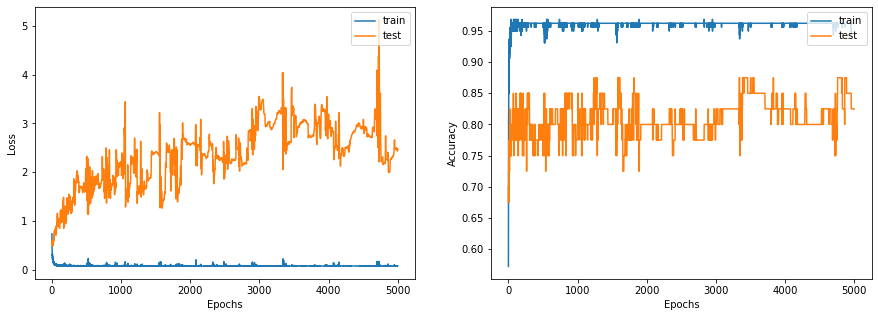

In [22]:
display_learning_curves(history_1)

In [23]:
_, test_accuracy = QFmodel_1.evaluate(x=X_test, y=YQF_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 76.74%


In [24]:
predYQF = np.zeros(len(YQF))
predYQF[train_idx] = YQF_train.reshape(-1)
predYQF[test_idx] = np.where(QFmodel_1.predict(X_test).reshape(-1)>0.5,1,0)
df['predYQF'] = predYQF

3/3 [==============================] - 0s 0s/step


In [25]:
df['mean_outOrigin_predQF'] = 0
df['mean_inOrigin_predQF'] = 0
df['mean_outDest_predQF'] = 0
df['mean_inDest_predQF'] = 0
for i in range(len(df)):
    OC = df.OriginCity.iloc[i]
    DC = df.DestCity.iloc[i]
    if len(df[df.OriginCity==OC][df.DestCity != DC]) > 0:
        df['mean_outOrigin_predQF'].iloc[i] = df[df.OriginCity==OC][df.DestCity != DC]['predYQF'].mean()
    else:
        df['mean_outOrigin_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.DestCity==OC]) > 0:
        df['mean_inOrigin_predQF'].iloc[i] = df[df.DestCity==OC]['predYQF'].mean()
    else:
        df['mean_inOrigin_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.OriginCity==DC]) > 0:
        df['mean_outDest_predQF'].iloc[i] = df[df.OriginCity==DC]['predYQF'].mean()
    else:
        df['mean_outDest_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.DestCity==DC][df.OriginCity != OC]) > 0:
        df['mean_inDest_predQF'].iloc[i] = df[df.DestCity==DC][df.OriginCity != OC]['predYQF'].mean()
    else:
        df['mean_inDest_predQF'].iloc[i] = df['predYQF'].iloc[i]

In [26]:
X = scaler.fit_transform(df[cols2].to_numpy())
X = np.column_stack((X,df[['mean_outOrigin_predQF','mean_inOrigin_predQF','mean_outDest_predQF',
                           'mean_inDest_predQF','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [27]:
X_train = X[train_idx].astype(np.float32)
X_test = X[test_idx].astype(np.float32)
QFmodel_2 = nn_sigmoid_model(676,[128,32],[0.3,0.1],1)
QFmodel_2.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
QFmodel_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               86656     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 90,817
Trainable params: 90,817
Non-trainable params: 0
_________________________________________________________________


In [28]:
history_2 = QFmodel_2.fit(X_train, YQF_train, validation_split=0.2, epochs=5000, verbose=2)

Epoch 1/5000
5/5 - 0s - loss: 1.4183 - accuracy: 0.3899 - val_loss: 0.6600 - val_accuracy: 0.5500 - 488ms/epoch - 98ms/step
Epoch 2/5000
5/5 - 0s - loss: 0.6443 - accuracy: 0.6730 - val_loss: 0.5440 - val_accuracy: 0.7500 - 34ms/epoch - 7ms/step
Epoch 3/5000
5/5 - 0s - loss: 0.4825 - accuracy: 0.7736 - val_loss: 0.5743 - val_accuracy: 0.7250 - 23ms/epoch - 5ms/step
Epoch 4/5000
5/5 - 0s - loss: 0.4491 - accuracy: 0.7862 - val_loss: 0.5678 - val_accuracy: 0.6750 - 22ms/epoch - 4ms/step
Epoch 5/5000
5/5 - 0s - loss: 0.4043 - accuracy: 0.8176 - val_loss: 0.5184 - val_accuracy: 0.7250 - 22ms/epoch - 4ms/step
Epoch 6/5000
5/5 - 0s - loss: 0.3652 - accuracy: 0.8302 - val_loss: 0.4748 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 7/5000
5/5 - 0s - loss: 0.3288 - accuracy: 0.8616 - val_loss: 0.4903 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 8/5000
5/5 - 0s - loss: 0.2954 - accuracy: 0.8679 - val_loss: 0.4994 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 9/5000
5/5 - 0s 

Epoch 68/5000
5/5 - 0s - loss: 0.0546 - accuracy: 0.9748 - val_loss: 0.7289 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 69/5000
5/5 - 0s - loss: 0.0987 - accuracy: 0.9497 - val_loss: 0.6921 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 70/5000
5/5 - 0s - loss: 0.0662 - accuracy: 0.9748 - val_loss: 0.6945 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 71/5000
5/5 - 0s - loss: 0.0788 - accuracy: 0.9686 - val_loss: 0.7390 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 72/5000
5/5 - 0s - loss: 0.0592 - accuracy: 0.9623 - val_loss: 0.8023 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 73/5000
5/5 - 0s - loss: 0.0646 - accuracy: 0.9623 - val_loss: 0.8094 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 74/5000
5/5 - 0s - loss: 0.0817 - accuracy: 0.9623 - val_loss: 0.7629 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 75/5000
5/5 - 0s - loss: 0.0654 - accuracy: 0.9686 - val_loss: 0.7630 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 76/5000
5/

Epoch 135/5000
5/5 - 0s - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.1717 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 136/5000
5/5 - 0s - loss: 0.0291 - accuracy: 0.9874 - val_loss: 1.1647 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 137/5000
5/5 - 0s - loss: 0.0324 - accuracy: 0.9874 - val_loss: 1.1422 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 138/5000
5/5 - 0s - loss: 0.0282 - accuracy: 0.9937 - val_loss: 1.1419 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 139/5000
5/5 - 0s - loss: 0.0453 - accuracy: 0.9811 - val_loss: 1.2031 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 140/5000
5/5 - 0s - loss: 0.0312 - accuracy: 1.0000 - val_loss: 1.1798 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 141/5000
5/5 - 0s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.2175 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 142/5000
5/5 - 0s - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.2305 - val_accuracy: 0.7750 - 20ms/epoch - 4ms/step
Epoch 14

5/5 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.0743 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 202/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.0866 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 203/5000
5/5 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.0903 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 204/5000
5/5 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.1065 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 205/5000
5/5 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.1055 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 206/5000
5/5 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.1172 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 207/5000
5/5 - 0s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.1598 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 208/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.2930 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 209/5000
5/5 - 0s

Epoch 268/5000
5/5 - 0s - loss: 0.0106 - accuracy: 0.9937 - val_loss: 1.4238 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 269/5000
5/5 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.3831 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 270/5000
5/5 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.3694 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 271/5000
5/5 - 0s - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.4507 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 272/5000
5/5 - 0s - loss: 0.0157 - accuracy: 0.9937 - val_loss: 1.4519 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 273/5000
5/5 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.3709 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 274/5000
5/5 - 0s - loss: 0.0107 - accuracy: 0.9937 - val_loss: 1.3507 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 275/5000
5/5 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.3716 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 27

Epoch 334/5000
5/5 - 0s - loss: 9.7409e-04 - accuracy: 1.0000 - val_loss: 1.8694 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 335/5000
5/5 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.8471 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 336/5000
5/5 - 0s - loss: 0.0050 - accuracy: 0.9937 - val_loss: 1.8197 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 337/5000
5/5 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.7956 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 338/5000
5/5 - 0s - loss: 6.8785e-04 - accuracy: 1.0000 - val_loss: 1.7814 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 339/5000
5/5 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.7780 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 340/5000
5/5 - 0s - loss: 0.0099 - accuracy: 0.9937 - val_loss: 1.7579 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 341/5000
5/5 - 0s - loss: 4.3189e-04 - accuracy: 1.0000 - val_loss: 1.7391 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/s

Epoch 400/5000
5/5 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.1146 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 401/5000
5/5 - 0s - loss: 4.5322e-04 - accuracy: 1.0000 - val_loss: 2.3943 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 402/5000
5/5 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.5238 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 403/5000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.6220 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 404/5000
5/5 - 0s - loss: 3.7326e-04 - accuracy: 1.0000 - val_loss: 2.6979 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 405/5000
5/5 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.7860 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 406/5000
5/5 - 0s - loss: 3.9743e-04 - accuracy: 1.0000 - val_loss: 2.8424 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 407/5000
5/5 - 0s - loss: 7.4085e-04 - accuracy: 1.0000 - val_loss: 2.8408 - val_accuracy: 0.7500 - 23ms/epoch - 5

Epoch 465/5000
5/5 - 0s - loss: 0.0126 - accuracy: 0.9937 - val_loss: 2.1229 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 466/5000
5/5 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0961 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 467/5000
5/5 - 0s - loss: 0.0221 - accuracy: 0.9874 - val_loss: 2.2263 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 468/5000
5/5 - 0s - loss: 0.0496 - accuracy: 0.9686 - val_loss: 2.1357 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 469/5000
5/5 - 0s - loss: 0.0359 - accuracy: 0.9811 - val_loss: 2.1304 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 470/5000
5/5 - 0s - loss: 0.0520 - accuracy: 0.9874 - val_loss: 2.1355 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 471/5000
5/5 - 0s - loss: 0.0723 - accuracy: 0.9686 - val_loss: 2.1797 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 472/5000
5/5 - 0s - loss: 0.0165 - accuracy: 0.9937 - val_loss: 2.1964 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 47

5/5 - 0s - loss: 0.0251 - accuracy: 0.9874 - val_loss: 2.2096 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 532/5000
5/5 - 0s - loss: 0.0219 - accuracy: 0.9937 - val_loss: 2.2047 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 533/5000
5/5 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 2.1931 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 534/5000
5/5 - 0s - loss: 0.0104 - accuracy: 0.9937 - val_loss: 2.2025 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 535/5000
5/5 - 0s - loss: 0.0155 - accuracy: 0.9874 - val_loss: 2.2169 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 536/5000
5/5 - 0s - loss: 0.0080 - accuracy: 0.9937 - val_loss: 2.2254 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 537/5000
5/5 - 0s - loss: 0.0357 - accuracy: 0.9748 - val_loss: 3.0675 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 538/5000
5/5 - 0s - loss: 0.1902 - accuracy: 0.9748 - val_loss: 1.9185 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 539/5000
5/5 - 0s

Epoch 598/5000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1474 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 599/5000
5/5 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.1505 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 600/5000
5/5 - 0s - loss: 0.0119 - accuracy: 0.9937 - val_loss: 2.1485 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 601/5000
5/5 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1332 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 602/5000
5/5 - 0s - loss: 0.0348 - accuracy: 0.9811 - val_loss: 2.4291 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 603/5000
5/5 - 0s - loss: 0.0133 - accuracy: 0.9937 - val_loss: 2.6194 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 604/5000
5/5 - 0s - loss: 0.0738 - accuracy: 0.9748 - val_loss: 2.5440 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 605/5000
5/5 - 0s - loss: 0.0492 - accuracy: 0.9811 - val_loss: 2.5337 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 60

5/5 - 0s - loss: 0.0099 - accuracy: 0.9937 - val_loss: 2.7348 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 665/5000
5/5 - 0s - loss: 0.0296 - accuracy: 0.9811 - val_loss: 2.7411 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 666/5000
5/5 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.7430 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 667/5000
5/5 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 2.7176 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 668/5000
5/5 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 2.6210 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 669/5000
5/5 - 0s - loss: 0.0186 - accuracy: 0.9874 - val_loss: 2.5520 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 670/5000
5/5 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.5190 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 671/5000
5/5 - 0s - loss: 0.0285 - accuracy: 0.9874 - val_loss: 2.5041 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 672/5000
5/5 - 0s

Epoch 731/5000
5/5 - 0s - loss: 0.0254 - accuracy: 0.9811 - val_loss: 2.4721 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 732/5000
5/5 - 0s - loss: 0.0113 - accuracy: 0.9937 - val_loss: 2.5635 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 733/5000
5/5 - 0s - loss: 0.0206 - accuracy: 0.9811 - val_loss: 2.6888 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 734/5000
5/5 - 0s - loss: 0.0074 - accuracy: 0.9937 - val_loss: 2.6769 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 735/5000
5/5 - 0s - loss: 0.0316 - accuracy: 0.9811 - val_loss: 2.6672 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 736/5000
5/5 - 0s - loss: 0.0221 - accuracy: 0.9811 - val_loss: 2.6379 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 737/5000
5/5 - 0s - loss: 0.0202 - accuracy: 0.9874 - val_loss: 2.5964 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 738/5000
5/5 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.5658 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 73

5/5 - 0s - loss: 0.0126 - accuracy: 0.9937 - val_loss: 3.0548 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 798/5000
5/5 - 0s - loss: 0.0175 - accuracy: 0.9874 - val_loss: 2.9833 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 799/5000
5/5 - 0s - loss: 0.0140 - accuracy: 0.9937 - val_loss: 2.9400 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 800/5000
5/5 - 0s - loss: 0.0123 - accuracy: 0.9937 - val_loss: 2.9168 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 801/5000
5/5 - 0s - loss: 0.0162 - accuracy: 0.9874 - val_loss: 2.9076 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 802/5000
5/5 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 2.9002 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 803/5000
5/5 - 0s - loss: 0.0308 - accuracy: 0.9811 - val_loss: 2.8857 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 804/5000
5/5 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.8740 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 805/5000
5/5 - 0s

Epoch 864/5000
5/5 - 0s - loss: 0.0167 - accuracy: 0.9937 - val_loss: 3.1472 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 865/5000
5/5 - 0s - loss: 0.0276 - accuracy: 0.9874 - val_loss: 3.1631 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 866/5000
5/5 - 0s - loss: 0.0213 - accuracy: 0.9874 - val_loss: 3.2332 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 867/5000
5/5 - 0s - loss: 0.0232 - accuracy: 0.9874 - val_loss: 3.3136 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 868/5000
5/5 - 0s - loss: 0.0287 - accuracy: 0.9874 - val_loss: 3.3322 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 869/5000
5/5 - 0s - loss: 0.0164 - accuracy: 0.9937 - val_loss: 3.3175 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 870/5000
5/5 - 0s - loss: 0.0213 - accuracy: 0.9874 - val_loss: 3.3000 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 871/5000
5/5 - 0s - loss: 0.0238 - accuracy: 0.9874 - val_loss: 3.2972 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 87

5/5 - 0s - loss: 0.0200 - accuracy: 0.9937 - val_loss: 3.1987 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 931/5000
5/5 - 0s - loss: 0.0378 - accuracy: 0.9748 - val_loss: 3.1936 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 932/5000
5/5 - 0s - loss: 0.0268 - accuracy: 0.9874 - val_loss: 3.2187 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 933/5000
5/5 - 0s - loss: 0.0201 - accuracy: 1.0000 - val_loss: 3.3238 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 934/5000
5/5 - 0s - loss: 0.0369 - accuracy: 0.9874 - val_loss: 3.3665 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 935/5000
5/5 - 0s - loss: 0.0208 - accuracy: 1.0000 - val_loss: 3.3249 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 936/5000
5/5 - 0s - loss: 0.0359 - accuracy: 0.9811 - val_loss: 3.2883 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 937/5000
5/5 - 0s - loss: 0.0327 - accuracy: 0.9874 - val_loss: 3.2675 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 938/5000
5/5 - 0s

Epoch 997/5000
5/5 - 0s - loss: 0.0357 - accuracy: 0.9874 - val_loss: 3.3201 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 998/5000
5/5 - 0s - loss: 0.0624 - accuracy: 0.9748 - val_loss: 3.2684 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 999/5000
5/5 - 0s - loss: 0.0844 - accuracy: 0.9811 - val_loss: 3.2403 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1000/5000
5/5 - 0s - loss: 0.0338 - accuracy: 0.9937 - val_loss: 3.3337 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1001/5000
5/5 - 0s - loss: 0.0419 - accuracy: 0.9748 - val_loss: 3.5474 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1002/5000
5/5 - 0s - loss: 0.0221 - accuracy: 0.9937 - val_loss: 3.6582 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1003/5000
5/5 - 0s - loss: 0.0244 - accuracy: 0.9874 - val_loss: 3.4158 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1004/5000
5/5 - 0s - loss: 0.0577 - accuracy: 0.9811 - val_loss: 3.2601 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epo

Epoch 1063/5000
5/5 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.9093 - val_accuracy: 0.8000 - 27ms/epoch - 5ms/step
Epoch 1064/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3.8625 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1065/5000
5/5 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.7843 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1066/5000
5/5 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.7244 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1067/5000
5/5 - 0s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 3.6905 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1068/5000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.6800 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1069/5000
5/5 - 0s - loss: 0.0068 - accuracy: 0.9937 - val_loss: 3.6796 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1070/5000
5/5 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.6886 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 1129/5000
5/5 - 0s - loss: 0.0267 - accuracy: 0.9937 - val_loss: 3.6789 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1130/5000
5/5 - 0s - loss: 0.0232 - accuracy: 0.9874 - val_loss: 3.6627 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1131/5000
5/5 - 0s - loss: 0.0152 - accuracy: 0.9937 - val_loss: 3.6568 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1132/5000
5/5 - 0s - loss: 0.0117 - accuracy: 0.9937 - val_loss: 3.6401 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1133/5000
5/5 - 0s - loss: 0.0700 - accuracy: 0.9937 - val_loss: 3.6030 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1134/5000
5/5 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5414 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 1135/5000
5/5 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.5032 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 1136/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 3.4890 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 1195/5000
5/5 - 0s - loss: 0.0527 - accuracy: 0.9811 - val_loss: 3.0078 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1196/5000
5/5 - 0s - loss: 0.0357 - accuracy: 0.9811 - val_loss: 2.7842 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1197/5000
5/5 - 0s - loss: 0.0359 - accuracy: 0.9811 - val_loss: 2.8875 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 1198/5000
5/5 - 0s - loss: 0.1028 - accuracy: 0.9874 - val_loss: 2.8149 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1199/5000
5/5 - 0s - loss: 0.0204 - accuracy: 0.9937 - val_loss: 2.9247 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1200/5000
5/5 - 0s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 3.0232 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1201/5000
5/5 - 0s - loss: 0.0343 - accuracy: 0.9874 - val_loss: 3.0982 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1202/5000
5/5 - 0s - loss: 0.0274 - accuracy: 0.9874 - val_loss: 3.1982 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 1261/5000
5/5 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.7117 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1262/5000
5/5 - 0s - loss: 0.0265 - accuracy: 0.9937 - val_loss: 4.4156 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1263/5000
5/5 - 0s - loss: 0.0077 - accuracy: 0.9937 - val_loss: 4.2395 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1264/5000
5/5 - 0s - loss: 0.0097 - accuracy: 0.9937 - val_loss: 4.1318 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 1265/5000
5/5 - 0s - loss: 0.0110 - accuracy: 0.9937 - val_loss: 4.0593 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1266/5000
5/5 - 0s - loss: 0.0079 - accuracy: 0.9937 - val_loss: 4.0360 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1267/5000
5/5 - 0s - loss: 0.0125 - accuracy: 0.9937 - val_loss: 4.0948 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1268/5000
5/5 - 0s - loss: 0.0180 - accuracy: 0.9874 - val_loss: 4.1409 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 1327/5000
5/5 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 4.4772 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1328/5000
5/5 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 4.4862 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1329/5000
5/5 - 0s - loss: 0.0187 - accuracy: 0.9937 - val_loss: 4.4949 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1330/5000
5/5 - 0s - loss: 0.0222 - accuracy: 0.9874 - val_loss: 4.3737 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 1331/5000
5/5 - 0s - loss: 0.0148 - accuracy: 0.9937 - val_loss: 4.3034 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 1332/5000
5/5 - 0s - loss: 0.0094 - accuracy: 0.9937 - val_loss: 4.2556 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1333/5000
5/5 - 0s - loss: 0.0153 - accuracy: 0.9937 - val_loss: 4.2286 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1334/5000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 4.2104 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 1393/5000
5/5 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 5.0412 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1394/5000
5/5 - 0s - loss: 0.0192 - accuracy: 0.9937 - val_loss: 5.3315 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1395/5000
5/5 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 5.3302 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 1396/5000
5/5 - 0s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 5.3218 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1397/5000
5/5 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 5.3074 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1398/5000
5/5 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 5.2313 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1399/5000
5/5 - 0s - loss: 0.0381 - accuracy: 0.9937 - val_loss: 4.3509 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 1400/5000
5/5 - 0s - loss: 0.0383 - accuracy: 0.9874 - val_loss: 4.2777 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 1459/5000
5/5 - 0s - loss: 0.0202 - accuracy: 0.9937 - val_loss: 4.7641 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1460/5000
5/5 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 4.7931 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1461/5000
5/5 - 0s - loss: 0.0142 - accuracy: 0.9937 - val_loss: 4.8099 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1462/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.8214 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1463/5000
5/5 - 0s - loss: 0.0177 - accuracy: 0.9937 - val_loss: 4.8198 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1464/5000
5/5 - 0s - loss: 0.0156 - accuracy: 0.9937 - val_loss: 4.8076 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1465/5000
5/5 - 0s - loss: 0.0142 - accuracy: 0.9937 - val_loss: 4.7710 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1466/5000
5/5 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 4.7396 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 1525/5000
5/5 - 0s - loss: 0.0154 - accuracy: 0.9874 - val_loss: 3.8124 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1526/5000
5/5 - 0s - loss: 0.0154 - accuracy: 0.9937 - val_loss: 3.8154 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1527/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.8318 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 1528/5000
5/5 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.8448 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1529/5000
5/5 - 0s - loss: 0.0171 - accuracy: 0.9874 - val_loss: 3.8619 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1530/5000
5/5 - 0s - loss: 0.0253 - accuracy: 0.9874 - val_loss: 3.9649 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 1531/5000
5/5 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 4.0395 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 1532/5000
5/5 - 0s - loss: 0.0255 - accuracy: 0.9811 - val_loss: 4.0670 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 1591/5000
5/5 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.6963 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1592/5000
5/5 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.7433 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1593/5000
5/5 - 0s - loss: 0.0280 - accuracy: 0.9874 - val_loss: 3.7712 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1594/5000
5/5 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.7826 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1595/5000
5/5 - 0s - loss: 0.0212 - accuracy: 0.9937 - val_loss: 3.7878 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1596/5000
5/5 - 0s - loss: 0.0168 - accuracy: 0.9937 - val_loss: 3.7949 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 1597/5000
5/5 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.8027 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1598/5000
5/5 - 0s - loss: 0.0190 - accuracy: 0.9937 - val_loss: 3.8267 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 1657/5000
5/5 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 4.4361 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1658/5000
5/5 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 4.4491 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1659/5000
5/5 - 0s - loss: 0.0213 - accuracy: 0.9937 - val_loss: 4.4523 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1660/5000
5/5 - 0s - loss: 0.0226 - accuracy: 0.9937 - val_loss: 4.4532 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1661/5000
5/5 - 0s - loss: 0.0375 - accuracy: 0.9874 - val_loss: 4.4520 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1662/5000
5/5 - 0s - loss: 0.0417 - accuracy: 0.9874 - val_loss: 4.4510 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 1663/5000
5/5 - 0s - loss: 0.0260 - accuracy: 0.9937 - val_loss: 4.4483 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1664/5000
5/5 - 0s - loss: 0.0065 - accuracy: 1.0000 - val_loss: 4.4495 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step


Epoch 1723/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 4.5142 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1724/5000
5/5 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.5195 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1725/5000
5/5 - 0s - loss: 0.0244 - accuracy: 0.9937 - val_loss: 4.5173 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1726/5000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 4.5215 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1727/5000
5/5 - 0s - loss: 0.0222 - accuracy: 0.9937 - val_loss: 4.5276 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1728/5000
5/5 - 0s - loss: 0.0239 - accuracy: 0.9937 - val_loss: 4.5451 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1729/5000
5/5 - 0s - loss: 0.0249 - accuracy: 0.9937 - val_loss: 4.5496 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1730/5000
5/5 - 0s - loss: 0.0239 - accuracy: 0.9937 - val_loss: 4.5407 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step


Epoch 1789/5000
5/5 - 0s - loss: 0.0220 - accuracy: 0.9937 - val_loss: 4.3954 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 1790/5000
5/5 - 0s - loss: 0.0231 - accuracy: 0.9937 - val_loss: 4.3894 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1791/5000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 4.3906 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1792/5000
5/5 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 4.3969 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 1793/5000
5/5 - 0s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 4.4067 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1794/5000
5/5 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 4.4177 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1795/5000
5/5 - 0s - loss: 0.0456 - accuracy: 0.9874 - val_loss: 4.4340 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1796/5000
5/5 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 4.4869 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step


Epoch 1855/5000
5/5 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.9540 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1856/5000
5/5 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 4.9627 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1857/5000
5/5 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.9696 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1858/5000
5/5 - 0s - loss: 0.0255 - accuracy: 0.9937 - val_loss: 4.9795 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1859/5000
5/5 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 4.9885 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 1860/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 4.9877 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 1861/5000
5/5 - 0s - loss: 0.0232 - accuracy: 0.9937 - val_loss: 4.9771 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 1862/5000
5/5 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.9713 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step


Epoch 1921/5000
5/5 - 0s - loss: 0.0241 - accuracy: 0.9874 - val_loss: 4.2789 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1922/5000
5/5 - 0s - loss: 0.0202 - accuracy: 0.9874 - val_loss: 4.2603 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1923/5000
5/5 - 0s - loss: 0.0272 - accuracy: 0.9874 - val_loss: 4.2486 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1924/5000
5/5 - 0s - loss: 0.0495 - accuracy: 0.9748 - val_loss: 4.2306 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1925/5000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 4.2237 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1926/5000
5/5 - 0s - loss: 0.0151 - accuracy: 0.9937 - val_loss: 4.2151 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1927/5000
5/5 - 0s - loss: 0.0265 - accuracy: 0.9874 - val_loss: 4.2083 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1928/5000
5/5 - 0s - loss: 0.0320 - accuracy: 0.9811 - val_loss: 4.2027 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step


Epoch 1987/5000
5/5 - 0s - loss: 0.0260 - accuracy: 0.9937 - val_loss: 3.5421 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 1988/5000
5/5 - 0s - loss: 0.0379 - accuracy: 0.9874 - val_loss: 3.5431 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 1989/5000
5/5 - 0s - loss: 0.0255 - accuracy: 0.9937 - val_loss: 3.5459 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 1990/5000
5/5 - 0s - loss: 0.0242 - accuracy: 0.9937 - val_loss: 3.5588 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 1991/5000
5/5 - 0s - loss: 0.0405 - accuracy: 0.9874 - val_loss: 3.5775 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 1992/5000
5/5 - 0s - loss: 0.0363 - accuracy: 0.9874 - val_loss: 3.5876 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 1993/5000
5/5 - 0s - loss: 0.0384 - accuracy: 0.9874 - val_loss: 3.5902 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 1994/5000
5/5 - 0s - loss: 0.0634 - accuracy: 0.9748 - val_loss: 3.5893 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step


Epoch 2053/5000
5/5 - 0s - loss: 0.0227 - accuracy: 0.9937 - val_loss: 4.0202 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2054/5000
5/5 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 4.0789 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 2055/5000
5/5 - 0s - loss: 0.0209 - accuracy: 0.9937 - val_loss: 4.0986 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 2056/5000
5/5 - 0s - loss: 0.0229 - accuracy: 0.9937 - val_loss: 4.1136 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 2057/5000
5/5 - 0s - loss: 0.0232 - accuracy: 0.9937 - val_loss: 4.1245 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2058/5000
5/5 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 4.1308 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2059/5000
5/5 - 0s - loss: 0.0267 - accuracy: 0.9937 - val_loss: 4.1207 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2060/5000
5/5 - 0s - loss: 0.0065 - accuracy: 1.0000 - val_loss: 4.0927 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 2119/5000
5/5 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 4.7932 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2120/5000
5/5 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 4.9030 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2121/5000
5/5 - 0s - loss: 0.0234 - accuracy: 0.9937 - val_loss: 4.9715 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2122/5000
5/5 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 5.0126 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2123/5000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 5.0410 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2124/5000
5/5 - 0s - loss: 0.0254 - accuracy: 0.9937 - val_loss: 5.0564 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2125/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 5.0698 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2126/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 5.0817 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 2185/5000
5/5 - 0s - loss: 0.0242 - accuracy: 0.9937 - val_loss: 5.0208 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2186/5000
5/5 - 0s - loss: 0.0238 - accuracy: 0.9937 - val_loss: 5.0269 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2187/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.0293 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2188/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.0358 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2189/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 5.0432 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2190/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.0543 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2191/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 5.0656 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2192/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 5.0760 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 2251/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 4.8670 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2252/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 4.8726 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2253/5000
5/5 - 0s - loss: 0.0239 - accuracy: 0.9937 - val_loss: 4.8776 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 2254/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 4.8824 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2255/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.8905 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 2256/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 4.8998 - val_accuracy: 0.8500 - 23ms/epoch - 5ms/step
Epoch 2257/5000
5/5 - 0s - loss: 0.0235 - accuracy: 0.9937 - val_loss: 4.9202 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 2258/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.0471 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step


Epoch 2317/5000
5/5 - 0s - loss: 0.0232 - accuracy: 0.9937 - val_loss: 5.2135 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 2318/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 5.2173 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 2319/5000
5/5 - 0s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 5.2181 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 2320/5000
5/5 - 0s - loss: 0.0223 - accuracy: 0.9937 - val_loss: 5.2164 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2321/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.2189 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2322/5000
5/5 - 0s - loss: 0.0237 - accuracy: 0.9937 - val_loss: 5.2173 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 2323/5000
5/5 - 0s - loss: 0.0228 - accuracy: 0.9937 - val_loss: 5.2143 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 2324/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.2178 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 2383/5000
5/5 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.9021 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2384/5000
5/5 - 0s - loss: 0.0327 - accuracy: 0.9874 - val_loss: 6.1060 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2385/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 6.3506 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 2386/5000
5/5 - 0s - loss: 0.0254 - accuracy: 0.9937 - val_loss: 6.5910 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 2387/5000
5/5 - 0s - loss: 0.1649 - accuracy: 0.9937 - val_loss: 6.2278 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2388/5000
5/5 - 0s - loss: 0.0253 - accuracy: 0.9937 - val_loss: 6.5131 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 2389/5000
5/5 - 0s - loss: 0.1285 - accuracy: 0.9874 - val_loss: 6.3830 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2390/5000
5/5 - 0s - loss: 0.0320 - accuracy: 0.9937 - val_loss: 6.1371 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 2449/5000
5/5 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.8510 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2450/5000
5/5 - 0s - loss: 0.0243 - accuracy: 0.9937 - val_loss: 4.8822 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2451/5000
5/5 - 0s - loss: 0.0244 - accuracy: 0.9937 - val_loss: 4.8933 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2452/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 4.9055 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2453/5000
5/5 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 4.9181 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2454/5000
5/5 - 0s - loss: 0.0252 - accuracy: 0.9937 - val_loss: 4.9277 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2455/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 4.9345 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2456/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.9424 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 2515/5000
5/5 - 0s - loss: 0.0268 - accuracy: 0.9937 - val_loss: 5.8870 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2516/5000
5/5 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.8929 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2517/5000
5/5 - 0s - loss: 0.0197 - accuracy: 0.9937 - val_loss: 5.8979 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2518/5000
5/5 - 0s - loss: 0.0249 - accuracy: 0.9937 - val_loss: 5.8990 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2519/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.8964 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2520/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.9003 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2521/5000
5/5 - 0s - loss: 0.0267 - accuracy: 0.9937 - val_loss: 5.9076 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2522/5000
5/5 - 0s - loss: 0.0237 - accuracy: 0.9937 - val_loss: 5.8991 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 2581/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.6885 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2582/5000
5/5 - 0s - loss: 0.0449 - accuracy: 0.9874 - val_loss: 5.7161 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2583/5000
5/5 - 0s - loss: 0.0279 - accuracy: 0.9937 - val_loss: 5.7006 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2584/5000
5/5 - 0s - loss: 0.0506 - accuracy: 0.9874 - val_loss: 5.6695 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2585/5000
5/5 - 0s - loss: 0.0236 - accuracy: 0.9937 - val_loss: 5.6517 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2586/5000
5/5 - 0s - loss: 0.0243 - accuracy: 0.9937 - val_loss: 5.6467 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2587/5000
5/5 - 0s - loss: 0.0234 - accuracy: 0.9937 - val_loss: 5.6635 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 2588/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.6720 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step


Epoch 2647/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.5820 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 2648/5000
5/5 - 0s - loss: 0.0236 - accuracy: 0.9937 - val_loss: 5.5831 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2649/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.5756 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 2650/5000
5/5 - 0s - loss: 0.0241 - accuracy: 0.9937 - val_loss: 5.5713 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 2651/5000
5/5 - 0s - loss: 0.0263 - accuracy: 0.9937 - val_loss: 5.5660 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 2652/5000
5/5 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 5.4368 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2653/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.3102 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2654/5000
5/5 - 0s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 5.2353 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 2713/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 5.3236 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2714/5000
5/5 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.3339 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2715/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.3472 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2716/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.3625 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2717/5000
5/5 - 0s - loss: 0.0256 - accuracy: 0.9937 - val_loss: 5.3720 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2718/5000
5/5 - 0s - loss: 0.0212 - accuracy: 0.9937 - val_loss: 5.3768 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2719/5000
5/5 - 0s - loss: 0.0457 - accuracy: 0.9874 - val_loss: 5.3650 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 2720/5000
5/5 - 0s - loss: 0.0256 - accuracy: 0.9937 - val_loss: 5.3438 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step


Epoch 2779/5000
5/5 - 0s - loss: 0.0238 - accuracy: 0.9937 - val_loss: 5.8869 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2780/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 6.1492 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2781/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 6.3235 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2782/5000
5/5 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 6.4308 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2783/5000
5/5 - 0s - loss: 0.0253 - accuracy: 0.9937 - val_loss: 6.4896 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2784/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 6.5186 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2785/5000
5/5 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 6.5416 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2786/5000
5/5 - 0s - loss: 0.0251 - accuracy: 0.9937 - val_loss: 6.5515 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step


Epoch 2845/5000
5/5 - 0s - loss: 0.0460 - accuracy: 0.9874 - val_loss: 6.3252 - val_accuracy: 0.8500 - 26ms/epoch - 5ms/step
Epoch 2846/5000
5/5 - 0s - loss: 0.0404 - accuracy: 0.9874 - val_loss: 6.2926 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 2847/5000
5/5 - 0s - loss: 0.0527 - accuracy: 0.9811 - val_loss: 6.6300 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 2848/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 6.8318 - val_accuracy: 0.8250 - 9ms/epoch - 2ms/step
Epoch 2849/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 6.9751 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 2850/5000
5/5 - 0s - loss: 0.0263 - accuracy: 0.9937 - val_loss: 7.0638 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 2851/5000
5/5 - 0s - loss: 0.0322 - accuracy: 0.9937 - val_loss: 6.5315 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 2852/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 6.2415 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
E

Epoch 2911/5000
5/5 - 0s - loss: 0.0249 - accuracy: 0.9937 - val_loss: 5.9024 - val_accuracy: 0.8500 - 31ms/epoch - 6ms/step
Epoch 2912/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 6.1396 - val_accuracy: 0.8500 - 16ms/epoch - 3ms/step
Epoch 2913/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 6.2954 - val_accuracy: 0.8500 - 16ms/epoch - 3ms/step
Epoch 2914/5000
5/5 - 0s - loss: 0.0217 - accuracy: 0.9937 - val_loss: 6.3830 - val_accuracy: 0.8500 - 16ms/epoch - 3ms/step
Epoch 2915/5000
5/5 - 0s - loss: 0.0567 - accuracy: 0.9937 - val_loss: 5.9796 - val_accuracy: 0.8500 - 16ms/epoch - 3ms/step
Epoch 2916/5000
5/5 - 0s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 5.3309 - val_accuracy: 0.9000 - 31ms/epoch - 6ms/step
Epoch 2917/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 5.0807 - val_accuracy: 0.9000 - 16ms/epoch - 3ms/step
Epoch 2918/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 4.9571 - val_accuracy: 0.8750 - 31ms/epoch - 6ms/step


Epoch 2977/5000
5/5 - 0s - loss: 0.0224 - accuracy: 0.9937 - val_loss: 4.6092 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 2978/5000
5/5 - 0s - loss: 0.0224 - accuracy: 0.9937 - val_loss: 4.6027 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 2979/5000
5/5 - 0s - loss: 0.0465 - accuracy: 0.9874 - val_loss: 4.5909 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 2980/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 4.5787 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 2981/5000
5/5 - 0s - loss: 0.0237 - accuracy: 0.9937 - val_loss: 4.5671 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step
Epoch 2982/5000
5/5 - 0s - loss: 0.0257 - accuracy: 0.9937 - val_loss: 4.5576 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 2983/5000
5/5 - 0s - loss: 0.0220 - accuracy: 0.9937 - val_loss: 4.5486 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 2984/5000
5/5 - 0s - loss: 0.0223 - accuracy: 0.9937 - val_loss: 4.5401 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step


Epoch 3043/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 4.3978 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step
Epoch 3044/5000
5/5 - 0s - loss: 0.0253 - accuracy: 0.9937 - val_loss: 4.3907 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3045/5000
5/5 - 0s - loss: 0.0260 - accuracy: 0.9937 - val_loss: 4.3818 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3046/5000
5/5 - 0s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 4.3757 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step
Epoch 3047/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 4.3759 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3048/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 4.3820 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3049/5000
5/5 - 0s - loss: 0.0263 - accuracy: 0.9937 - val_loss: 4.3853 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3050/5000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.3908 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step


Epoch 3109/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 4.9752 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3110/5000
5/5 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 4.9838 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3111/5000
5/5 - 0s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 4.9941 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3112/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 5.0022 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3113/5000
5/5 - 0s - loss: 0.0239 - accuracy: 0.9937 - val_loss: 5.0046 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3114/5000
5/5 - 0s - loss: 0.0234 - accuracy: 0.9937 - val_loss: 5.0045 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3115/5000
5/5 - 0s - loss: 0.0455 - accuracy: 0.9874 - val_loss: 4.9885 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step
Epoch 3116/5000
5/5 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 5.0496 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step


Epoch 3175/5000
5/5 - 0s - loss: 0.0240 - accuracy: 0.9937 - val_loss: 5.0577 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3176/5000
5/5 - 0s - loss: 0.0449 - accuracy: 0.9874 - val_loss: 5.0445 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step
Epoch 3177/5000
5/5 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 5.0360 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3178/5000
5/5 - 0s - loss: 0.0258 - accuracy: 0.9937 - val_loss: 5.0340 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step
Epoch 3179/5000
5/5 - 0s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 5.0357 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3180/5000
5/5 - 0s - loss: 0.0230 - accuracy: 0.9937 - val_loss: 5.0422 - val_accuracy: 0.9000 - 23ms/epoch - 5ms/step
Epoch 3181/5000
5/5 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 5.0465 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3182/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 5.0575 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step


Epoch 3241/5000
5/5 - 0s - loss: 0.0230 - accuracy: 0.9937 - val_loss: 5.0700 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3242/5000
5/5 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 5.0601 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3243/5000
5/5 - 0s - loss: 0.0256 - accuracy: 0.9937 - val_loss: 5.0562 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3244/5000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 5.0571 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3245/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.0675 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3246/5000
5/5 - 0s - loss: 0.0437 - accuracy: 0.9874 - val_loss: 5.0508 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3247/5000
5/5 - 0s - loss: 0.0258 - accuracy: 0.9937 - val_loss: 5.0374 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3248/5000
5/5 - 0s - loss: 0.0237 - accuracy: 0.9937 - val_loss: 5.0224 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step


Epoch 3307/5000
5/5 - 0s - loss: 0.0484 - accuracy: 0.9874 - val_loss: 5.0938 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 3308/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 5.0753 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3309/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 5.0745 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3310/5000
5/5 - 0s - loss: 0.0254 - accuracy: 0.9937 - val_loss: 5.0736 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3311/5000
5/5 - 0s - loss: 0.0263 - accuracy: 0.9937 - val_loss: 5.0714 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3312/5000
5/5 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 5.0692 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 3313/5000
5/5 - 0s - loss: 0.0263 - accuracy: 0.9937 - val_loss: 5.0696 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3314/5000
5/5 - 0s - loss: 0.0200 - accuracy: 0.9937 - val_loss: 5.0648 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step


Epoch 3373/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.1196 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3374/5000
5/5 - 0s - loss: 0.0264 - accuracy: 0.9937 - val_loss: 5.1275 - val_accuracy: 0.9000 - 20ms/epoch - 4ms/step
Epoch 3375/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 5.1280 - val_accuracy: 0.9000 - 20ms/epoch - 4ms/step
Epoch 3376/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.1378 - val_accuracy: 0.9000 - 16ms/epoch - 3ms/step
Epoch 3377/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.1537 - val_accuracy: 0.9000 - 31ms/epoch - 6ms/step
Epoch 3378/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.1736 - val_accuracy: 0.9000 - 16ms/epoch - 3ms/step
Epoch 3379/5000
5/5 - 0s - loss: 0.0256 - accuracy: 0.9937 - val_loss: 5.1787 - val_accuracy: 0.9000 - 16ms/epoch - 3ms/step
Epoch 3380/5000
5/5 - 0s - loss: 0.0463 - accuracy: 0.9874 - val_loss: 5.1682 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step


Epoch 3439/5000
5/5 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.3376 - val_accuracy: 0.8750 - 31ms/epoch - 6ms/step
Epoch 3440/5000
5/5 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.3562 - val_accuracy: 0.8750 - 16ms/epoch - 3ms/step
Epoch 3441/5000
5/5 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.3767 - val_accuracy: 0.8750 - 31ms/epoch - 6ms/step
Epoch 3442/5000
5/5 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 5.3956 - val_accuracy: 0.8750 - 16ms/epoch - 3ms/step
Epoch 3443/5000
5/5 - 0s - loss: 0.0253 - accuracy: 0.9937 - val_loss: 5.4104 - val_accuracy: 0.8750 - 31ms/epoch - 6ms/step
Epoch 3444/5000
5/5 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 5.4139 - val_accuracy: 0.8750 - 16ms/epoch - 3ms/step
Epoch 3445/5000
5/5 - 0s - loss: 0.0494 - accuracy: 0.9874 - val_loss: 5.4073 - val_accuracy: 0.8750 - 16ms/epoch - 3ms/step
Epoch 3446/5000
5/5 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.3914 - val_accuracy: 0.8750 - 31ms/epoch - 6ms/step


Epoch 3505/5000
5/5 - 0s - loss: 0.0647 - accuracy: 0.9811 - val_loss: 5.2336 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3506/5000
5/5 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.2079 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3507/5000
5/5 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 5.2021 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3508/5000
5/5 - 0s - loss: 0.0249 - accuracy: 0.9937 - val_loss: 5.2049 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3509/5000
5/5 - 0s - loss: 0.0233 - accuracy: 0.9937 - val_loss: 5.1874 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3510/5000
5/5 - 0s - loss: 0.0637 - accuracy: 0.9811 - val_loss: 5.1631 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3511/5000
5/5 - 0s - loss: 0.0243 - accuracy: 0.9937 - val_loss: 5.1263 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3512/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 5.1046 - val_accuracy: 0.9000 - 17ms/epoch - 3ms/step


Epoch 3571/5000
5/5 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 5.2003 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3572/5000
5/5 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.2135 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3573/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.2294 - val_accuracy: 0.9000 - 21ms/epoch - 4ms/step
Epoch 3574/5000
5/5 - 0s - loss: 0.0248 - accuracy: 0.9937 - val_loss: 5.2464 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3575/5000
5/5 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 5.2530 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 3576/5000
5/5 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.2680 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3577/5000
5/5 - 0s - loss: 0.0269 - accuracy: 0.9937 - val_loss: 5.2757 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3578/5000
5/5 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.2783 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step


Epoch 3637/5000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 5.2759 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3638/5000
5/5 - 0s - loss: 0.0165 - accuracy: 0.9937 - val_loss: 5.1890 - val_accuracy: 0.9000 - 22ms/epoch - 4ms/step
Epoch 3639/5000
5/5 - 0s - loss: 0.1756 - accuracy: 0.9686 - val_loss: 5.1704 - val_accuracy: 0.8750 - 22ms/epoch - 4ms/step
Epoch 3640/5000
5/5 - 0s - loss: 0.1916 - accuracy: 0.9686 - val_loss: 4.8182 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 3641/5000
5/5 - 0s - loss: 0.4459 - accuracy: 0.9245 - val_loss: 4.6983 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3642/5000
5/5 - 0s - loss: 0.1752 - accuracy: 0.9686 - val_loss: 4.8016 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3643/5000
5/5 - 0s - loss: 0.2332 - accuracy: 0.9623 - val_loss: 4.5394 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step
Epoch 3644/5000
5/5 - 0s - loss: 0.1095 - accuracy: 0.9560 - val_loss: 4.4382 - val_accuracy: 0.8750 - 23ms/epoch - 5ms/step


Epoch 3703/5000
5/5 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 3.7920 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 3704/5000
5/5 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.7829 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3705/5000
5/5 - 0s - loss: 0.0235 - accuracy: 0.9937 - val_loss: 3.7749 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3706/5000
5/5 - 0s - loss: 0.0206 - accuracy: 0.9937 - val_loss: 3.7743 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3707/5000
5/5 - 0s - loss: 0.0245 - accuracy: 0.9937 - val_loss: 3.7651 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3708/5000
5/5 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 3.7615 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 3709/5000
5/5 - 0s - loss: 0.0433 - accuracy: 0.9874 - val_loss: 3.7612 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3710/5000
5/5 - 0s - loss: 0.0214 - accuracy: 0.9937 - val_loss: 3.7616 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 3769/5000
5/5 - 0s - loss: 0.0252 - accuracy: 0.9937 - val_loss: 4.5311 - val_accuracy: 0.8250 - 21ms/epoch - 4ms/step
Epoch 3770/5000
5/5 - 0s - loss: 0.0716 - accuracy: 0.9937 - val_loss: 4.7807 - val_accuracy: 0.8250 - 22ms/epoch - 4ms/step
Epoch 3771/5000
5/5 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 5.2065 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3772/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 5.5006 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 3773/5000
5/5 - 0s - loss: 0.0570 - accuracy: 0.9874 - val_loss: 5.2093 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 3774/5000
5/5 - 0s - loss: 0.0231 - accuracy: 0.9937 - val_loss: 5.0445 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 3775/5000
5/5 - 0s - loss: 0.0200 - accuracy: 0.9937 - val_loss: 4.9689 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 3776/5000
5/5 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.9404 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 3835/5000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 5.2171 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 3836/5000
5/5 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 5.2416 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 3837/5000
5/5 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 5.2585 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 3838/5000
5/5 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.2710 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 3839/5000
5/5 - 0s - loss: 0.0317 - accuracy: 0.9937 - val_loss: 5.2803 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 3840/5000
5/5 - 0s - loss: 0.0388 - accuracy: 0.9874 - val_loss: 5.2693 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 3841/5000
5/5 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.2026 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 3842/5000
5/5 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.1688 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step


Epoch 3901/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 4.2342 - val_accuracy: 0.8250 - 16ms/epoch - 3ms/step
Epoch 3902/5000
5/5 - 0s - loss: 0.0219 - accuracy: 0.9937 - val_loss: 4.2035 - val_accuracy: 0.8500 - 31ms/epoch - 6ms/step
Epoch 3903/5000
5/5 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.1964 - val_accuracy: 0.8500 - 16ms/epoch - 3ms/step
Epoch 3904/5000
5/5 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.1988 - val_accuracy: 0.8500 - 31ms/epoch - 6ms/step
Epoch 3905/5000
5/5 - 0s - loss: 0.0409 - accuracy: 0.9874 - val_loss: 4.1965 - val_accuracy: 0.8500 - 16ms/epoch - 3ms/step
Epoch 3906/5000
5/5 - 0s - loss: 0.0256 - accuracy: 0.9937 - val_loss: 4.2063 - val_accuracy: 0.8500 - 32ms/epoch - 6ms/step
Epoch 3907/5000
5/5 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.2655 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3908/5000
5/5 - 0s - loss: 0.0386 - accuracy: 0.9874 - val_loss: 4.2996 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step


Epoch 3967/5000
5/5 - 0s - loss: 0.0243 - accuracy: 0.9937 - val_loss: 4.2968 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3968/5000
5/5 - 0s - loss: 0.0592 - accuracy: 0.9874 - val_loss: 4.2731 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3969/5000
5/5 - 0s - loss: 0.0220 - accuracy: 0.9937 - val_loss: 4.2526 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3970/5000
5/5 - 0s - loss: 0.0196 - accuracy: 0.9937 - val_loss: 4.2356 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3971/5000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.2300 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3972/5000
5/5 - 0s - loss: 0.0235 - accuracy: 0.9937 - val_loss: 4.2286 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step
Epoch 3973/5000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.2329 - val_accuracy: 0.8500 - 22ms/epoch - 4ms/step
Epoch 3974/5000
5/5 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 4.2413 - val_accuracy: 0.8500 - 21ms/epoch - 4ms/step


Epoch 4033/5000
5/5 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 5.5826 - val_accuracy: 0.7750 - 24ms/epoch - 5ms/step
Epoch 4034/5000
5/5 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 5.5923 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4035/5000
5/5 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 5.6038 - val_accuracy: 0.7750 - 11ms/epoch - 2ms/step
Epoch 4036/5000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 5.6163 - val_accuracy: 0.7750 - 31ms/epoch - 6ms/step
Epoch 4037/5000
5/5 - 0s - loss: 0.0329 - accuracy: 0.9937 - val_loss: 5.6117 - val_accuracy: 0.7750 - 16ms/epoch - 3ms/step
Epoch 4038/5000
5/5 - 0s - loss: 0.0263 - accuracy: 0.9937 - val_loss: 5.5961 - val_accuracy: 0.7750 - 31ms/epoch - 6ms/step
Epoch 4039/5000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 5.5791 - val_accuracy: 0.7750 - 24ms/epoch - 5ms/step
Epoch 4040/5000
5/5 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 5.5738 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step


Epoch 4099/5000
5/5 - 0s - loss: 0.0241 - accuracy: 0.9937 - val_loss: 8.8390 - val_accuracy: 0.7750 - 31ms/epoch - 6ms/step
Epoch 4100/5000
5/5 - 0s - loss: 0.0774 - accuracy: 0.9811 - val_loss: 8.7777 - val_accuracy: 0.7750 - 16ms/epoch - 3ms/step
Epoch 4101/5000
5/5 - 0s - loss: 0.0431 - accuracy: 0.9874 - val_loss: 8.7288 - val_accuracy: 0.7750 - 16ms/epoch - 3ms/step
Epoch 4102/5000
5/5 - 0s - loss: 0.0224 - accuracy: 0.9937 - val_loss: 8.7076 - val_accuracy: 0.7750 - 31ms/epoch - 6ms/step
Epoch 4103/5000
5/5 - 0s - loss: 0.0244 - accuracy: 0.9937 - val_loss: 8.6864 - val_accuracy: 0.7750 - 16ms/epoch - 3ms/step
Epoch 4104/5000
5/5 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 8.6843 - val_accuracy: 0.7750 - 31ms/epoch - 6ms/step
Epoch 4105/5000
5/5 - 0s - loss: 0.0255 - accuracy: 0.9937 - val_loss: 8.6880 - val_accuracy: 0.7750 - 24ms/epoch - 5ms/step
Epoch 4106/5000
5/5 - 0s - loss: 0.0234 - accuracy: 0.9937 - val_loss: 8.6924 - val_accuracy: 0.7750 - 18ms/epoch - 4ms/step


Epoch 4165/5000
5/5 - 0s - loss: 0.0440 - accuracy: 0.9874 - val_loss: 7.5436 - val_accuracy: 0.7500 - 33ms/epoch - 7ms/step
Epoch 4166/5000
5/5 - 0s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 7.6514 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4167/5000
5/5 - 0s - loss: 0.0219 - accuracy: 0.9937 - val_loss: 7.7263 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4168/5000
5/5 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 7.7744 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4169/5000
5/5 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 7.8128 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4170/5000
5/5 - 0s - loss: 0.0427 - accuracy: 0.9874 - val_loss: 7.8346 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4171/5000
5/5 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 7.8421 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4172/5000
5/5 - 0s - loss: 0.0415 - accuracy: 0.9874 - val_loss: 7.8362 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step


Epoch 4231/5000
5/5 - 0s - loss: 0.0244 - accuracy: 0.9937 - val_loss: 7.2927 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4232/5000
5/5 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 7.2998 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4233/5000
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 7.3116 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4234/5000
5/5 - 0s - loss: 0.0229 - accuracy: 0.9937 - val_loss: 7.3166 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4235/5000
5/5 - 0s - loss: 0.0441 - accuracy: 0.9874 - val_loss: 7.3154 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4236/5000
5/5 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 7.3212 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4237/5000
5/5 - 0s - loss: 0.0249 - accuracy: 0.9937 - val_loss: 7.3301 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4238/5000
5/5 - 0s - loss: 0.0243 - accuracy: 0.9937 - val_loss: 7.3271 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step


Epoch 4297/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.5452 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4298/5000
5/5 - 0s - loss: 0.0260 - accuracy: 0.9937 - val_loss: 7.5549 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4299/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.5684 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4300/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 7.5854 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4301/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 7.6043 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4302/5000
5/5 - 0s - loss: 0.0263 - accuracy: 0.9937 - val_loss: 7.6080 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4303/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 7.6190 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4304/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 7.6344 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step


Epoch 4363/5000
5/5 - 0s - loss: 0.0209 - accuracy: 0.9937 - val_loss: 7.6837 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4364/5000
5/5 - 0s - loss: 0.0242 - accuracy: 0.9937 - val_loss: 7.6829 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4365/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.6930 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4366/5000
5/5 - 0s - loss: 0.0228 - accuracy: 0.9937 - val_loss: 7.6990 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4367/5000
5/5 - 0s - loss: 0.0458 - accuracy: 0.9874 - val_loss: 7.7002 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4368/5000
5/5 - 0s - loss: 0.0235 - accuracy: 0.9937 - val_loss: 7.6771 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4369/5000
5/5 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 7.6710 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4370/5000
5/5 - 0s - loss: 0.0468 - accuracy: 0.9874 - val_loss: 7.6586 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step


Epoch 4429/5000
5/5 - 0s - loss: 0.0242 - accuracy: 0.9937 - val_loss: 8.2808 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4430/5000
5/5 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 8.2955 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4431/5000
5/5 - 0s - loss: 0.0220 - accuracy: 0.9937 - val_loss: 8.3010 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4432/5000
5/5 - 0s - loss: 0.0223 - accuracy: 0.9937 - val_loss: 8.3082 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4433/5000
5/5 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 8.3079 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4434/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 8.3175 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4435/5000
5/5 - 0s - loss: 0.0481 - accuracy: 0.9874 - val_loss: 8.2956 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4436/5000
5/5 - 0s - loss: 0.0250 - accuracy: 0.9937 - val_loss: 8.2764 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step


Epoch 4495/5000
5/5 - 0s - loss: 0.0669 - accuracy: 0.9811 - val_loss: 8.1764 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4496/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 8.1376 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4497/5000
5/5 - 0s - loss: 0.0259 - accuracy: 0.9937 - val_loss: 8.1092 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4498/5000
5/5 - 0s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 8.0798 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4499/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 8.0695 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4500/5000
5/5 - 0s - loss: 0.0238 - accuracy: 0.9937 - val_loss: 8.0721 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4501/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 8.0702 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4502/5000
5/5 - 0s - loss: 0.0259 - accuracy: 0.9937 - val_loss: 8.0694 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step


Epoch 4561/5000
5/5 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 7.5664 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 4562/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.5871 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4563/5000
5/5 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 7.6108 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4564/5000
5/5 - 0s - loss: 0.0253 - accuracy: 0.9937 - val_loss: 7.6231 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4565/5000
5/5 - 0s - loss: 0.0259 - accuracy: 0.9937 - val_loss: 7.5775 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4566/5000
5/5 - 0s - loss: 0.0251 - accuracy: 0.9937 - val_loss: 7.5177 - val_accuracy: 0.7500 - 23ms/epoch - 5ms/step
Epoch 4567/5000
5/5 - 0s - loss: 0.0268 - accuracy: 0.9937 - val_loss: 7.4603 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4568/5000
5/5 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 7.4371 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step


Epoch 4627/5000
5/5 - 0s - loss: 0.0461 - accuracy: 0.9937 - val_loss: 8.1580 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4628/5000
5/5 - 0s - loss: 0.0164 - accuracy: 0.9874 - val_loss: 7.0207 - val_accuracy: 0.8250 - 24ms/epoch - 5ms/step
Epoch 4629/5000
5/5 - 0s - loss: 0.0426 - accuracy: 0.9811 - val_loss: 6.8182 - val_accuracy: 0.8250 - 23ms/epoch - 5ms/step
Epoch 4630/5000
5/5 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 7.5477 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4631/5000
5/5 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 8.0164 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4632/5000
5/5 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 8.3161 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4633/5000
5/5 - 0s - loss: 0.0260 - accuracy: 0.9937 - val_loss: 8.4893 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4634/5000
5/5 - 0s - loss: 0.0239 - accuracy: 0.9937 - val_loss: 8.5957 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4693/5000
5/5 - 0s - loss: 0.0269 - accuracy: 0.9937 - val_loss: 8.7983 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4694/5000
5/5 - 0s - loss: 0.0587 - accuracy: 0.9874 - val_loss: 7.6541 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4695/5000
5/5 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 7.1449 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4696/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 6.9303 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4697/5000
5/5 - 0s - loss: 0.0345 - accuracy: 0.9874 - val_loss: 6.7864 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 4698/5000
5/5 - 0s - loss: 0.0256 - accuracy: 0.9937 - val_loss: 6.6620 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4699/5000
5/5 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 6.6164 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 4700/5000
5/5 - 0s - loss: 0.0512 - accuracy: 0.9874 - val_loss: 6.8048 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4759/5000
5/5 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 7.0844 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4760/5000
5/5 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 7.0931 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4761/5000
5/5 - 0s - loss: 0.0244 - accuracy: 0.9937 - val_loss: 7.0984 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4762/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.1033 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4763/5000
5/5 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.1163 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4764/5000
5/5 - 0s - loss: 0.0250 - accuracy: 0.9937 - val_loss: 7.1172 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4765/5000
5/5 - 0s - loss: 0.0423 - accuracy: 0.9874 - val_loss: 7.1054 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4766/5000
5/5 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 7.0970 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4825/5000
5/5 - 0s - loss: 0.0477 - accuracy: 0.9874 - val_loss: 6.9949 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4826/5000
5/5 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 6.9538 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 4827/5000
5/5 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 6.9268 - val_accuracy: 0.7750 - 23ms/epoch - 5ms/step
Epoch 4828/5000
5/5 - 0s - loss: 0.0254 - accuracy: 0.9937 - val_loss: 6.9157 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 4829/5000
5/5 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 6.9169 - val_accuracy: 0.7750 - 22ms/epoch - 4ms/step
Epoch 4830/5000
5/5 - 0s - loss: 0.0212 - accuracy: 0.9937 - val_loss: 6.9239 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4831/5000
5/5 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 6.9292 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4832/5000
5/5 - 0s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 6.9342 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


Epoch 4891/5000
5/5 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 7.9484 - val_accuracy: 0.7750 - 21ms/epoch - 4ms/step
Epoch 4892/5000
5/5 - 0s - loss: 0.0188 - accuracy: 0.9874 - val_loss: 7.7922 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4893/5000
5/5 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 7.5698 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4894/5000
5/5 - 0s - loss: 0.0210 - accuracy: 0.9937 - val_loss: 7.4393 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4895/5000
5/5 - 0s - loss: 0.0545 - accuracy: 0.9874 - val_loss: 7.3313 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4896/5000
5/5 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 7.2689 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4897/5000
5/5 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 7.2417 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4898/5000
5/5 - 0s - loss: 0.0245 - accuracy: 0.9937 - val_loss: 7.2316 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step


Epoch 4957/5000
5/5 - 0s - loss: 0.0241 - accuracy: 0.9937 - val_loss: 7.3241 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4958/5000
5/5 - 0s - loss: 0.0239 - accuracy: 0.9937 - val_loss: 7.2933 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4959/5000
5/5 - 0s - loss: 0.0213 - accuracy: 0.9937 - val_loss: 7.2734 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4960/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 7.2646 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4961/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 7.2695 - val_accuracy: 0.8000 - 21ms/epoch - 4ms/step
Epoch 4962/5000
5/5 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 7.2825 - val_accuracy: 0.8000 - 23ms/epoch - 5ms/step
Epoch 4963/5000
5/5 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 7.2993 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step
Epoch 4964/5000
5/5 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 7.3207 - val_accuracy: 0.8000 - 22ms/epoch - 4ms/step


In [29]:
_, test_accuracy = QFmodel_2.evaluate(x=X_test, y=YQF_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 76.74%


In [30]:
predYQF = np.zeros(len(YQF))
predYQF[train_idx] = YQF_train.reshape(-1)
predYQF[test_idx] = np.where(QFmodel_2.predict(X_test).reshape(-1)>0.5,1,0)
df['predYQF'] = predYQF

3/3 [==============================] - 0s 0s/step


In [31]:
df['mean_outOrigin_predQF'] = 0
df['mean_inOrigin_predQF'] = 0
df['mean_outDest_predQF'] = 0
df['mean_inDest_predQF'] = 0
for i in range(len(df)):
    OC = df.OriginCity.iloc[i]
    DC = df.DestCity.iloc[i]
    if len(df[df.OriginCity==OC][df.DestCity != DC]) > 0:
        df['mean_outOrigin_predQF'].iloc[i] = df[df.OriginCity==OC][df.DestCity != DC]['predYQF'].mean()
    else:
        df['mean_outOrigin_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.DestCity==OC]) > 0:
        df['mean_inOrigin_predQF'].iloc[i] = df[df.DestCity==OC]['predYQF'].mean()
    else:
        df['mean_inOrigin_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.OriginCity==DC]) > 0:
        df['mean_outDest_predQF'].iloc[i] = df[df.OriginCity==DC]['predYQF'].mean()
    else:
        df['mean_outDest_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.DestCity==DC][df.OriginCity != OC]) > 0:
        df['mean_inDest_predQF'].iloc[i] = df[df.DestCity==DC][df.OriginCity != OC]['predYQF'].mean()
    else:
        df['mean_inDest_predQF'].iloc[i] = df['predYQF'].iloc[i]

In [32]:
X = scaler.fit_transform(df[cols2].to_numpy())
X = np.column_stack((X,df[['mean_outOrigin_predQF','mean_inOrigin_predQF','mean_outDest_predQF',
                           'mean_inDest_predQF','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [33]:
X_train = X[train_idx].astype(np.float32)
X_test = X[test_idx].astype(np.float32)

In [34]:
Edgelist1 = pickle.load(open('Edgelist1_dep.obj','rb'))
Edgelist2 = pickle.load(open('Edgelist2_dep.obj','rb'))

In [35]:
s = ['firmnum','CityPair','OriginState','DestState','OriginCity','DestCity']
dvar = ['city_pairVA','city_pairQF','city_pairJQ','city_pairZL','city_pairQQ','city_pairTT','city_pairFC','city_pairTL',
        'city_pairFP','city_pairQN','city_pairSH','city_pairLCC']
cols3 = [x for x in df.columns.tolist() if (x not in s) & (x not in dvar)]

In [36]:
df3=pd.concat([df,df]).reset_index()

In [37]:
df3['index'] = np.arange(len(df3))

In [38]:
Edgelist2 = [(x+285,y+285) for x,y in Edgelist2]

In [39]:
Edgelist = np.array(Edgelist1+Edgelist2).T

In [40]:
df4 = df3[[x for x in cols3 if x not in ['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']]].apply(zscore)
df4 = pd.concat([df4,df3[['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']]],axis=1)

In [41]:
cols4 = cols3 + ['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']

In [42]:
df4.tail()

,OriginPop,DestPop,Average_Fare,operate1VA,operate1QF,operate1JQ,operate1ZL,operate1QQ,operate1TT,operate1FC,operate1TL,operate1FP,operate1QN,operate1SH,operate1LCC,operate2VA,operate2QF,operate2JQ,operate2ZL,operate2QQ,operate2TT,operate2FC,operate2TL,operate2FP,operate2QN,operate2SH,operate2LCC,AirpresenceVA,AirpresenceQF,AirpresenceJQ,AirpresenceZL,AirpresenceQQ,AirpresenceTT,AirpresenceFC,AirpresenceTL,AirpresenceFP,AirpresenceQN,AirpresenceSH,AirpresenceLCC,OrigCityPresenceSeatVA,OrigCityPresenceSeatQF,OrigCityPresenceSeatJQ,OrigCityPresenceSeatZL,OrigCityPresenceSeatQQ,OrigCityPresenceSeatTT,OrigCityPresenceSeatFC,OrigCityPresenceSeatTL,OrigCityPresenceSeatFP,OrigCityPresenceSeatQN,OrigCityPresenceSeatSH,OrigCityPresenceSeatLCC,DestCityPresenceSeatVA,DestCityPresenceSeatQF,DestCityPresenceSeatJQ,DestCityPresenceSeatZL,DestCityPresenceSeatQQ,DestCityPresenceSeatTT,DestCityPresenceSeatFC,DestCityPresenceSeatTL,DestCityPresenceSeatFP,DestCityPresenceSeatQN,DestCityPresenceSeatSH,DestCityPresenceSeatLCC,OrigAirRouteVA,OrigAirRouteQF,OrigAirRouteJQ,OrigAirRouteZL,OrigAirRouteQQ,OrigAirRouteTT,OrigAirRouteFC,OrigAirRouteTL,OrigAirRouteFP,OrigAirRouteQN,OrigAirRouteSH,OrigAirRouteLCC,DestAirRouteVA,DestAirRouteQF,DestAirRouteJQ,DestAirRouteZL,DestAirRouteQQ,DestAirRouteTT,DestAirRouteFC,DestAirRouteTL,DestAirRouteFP,DestAirRouteQN,DestAirRouteSH,DestAirRouteLCC,distVA,distQF,distJQ,distZL,distQQ,distTT,distFC,distTL,distFP,distQN,distSH,distLCC,RouteOrig,RouteDest,distance,Totalbusinesses1,Agriculture1,Mining1,Manufacturing1,Accommodation1,Transport1,Medianincome1,Totalbusinesses2,Agriculture2,Mining2,Manufacturing2,Accommodation2,Transport2,Medianincome2,PAX,Seats,mean_outOriginOriginPop,mean_inOriginOriginPop,mean_outDestOriginPop,mean_inDestOriginPop,mean_outOriginDestPop,mean_inOriginDestPop,mean_outDestDestPop,mean_inDestDestPop,mean_outOrigincity_pairVA,mean_inOrigincity_pairVA,mean_outDestcity_pairVA,mean_inDestcity_pairVA,mean_outOrigincity_pairQF,mean_inOrigincity_pairQF,mean_outDestcity_pairQF,mean_inDestcity_pairQF,mean_outOrigincity_pairJQ,mean_inOrigincity_pairJQ,mean_outDestcity_pairJQ,mean_inDestcity_pairJQ,mean_outOrigincity_pairZL,mean_inOrigincity_pairZL,mean_outDestcity_pairZL,mean_inDestcity_pairZL,mean_outOrigincity_pairQQ,mean_inOrigincity_pairQQ,mean_outDestcity_pairQQ,mean_inDestcity_pairQQ,mean_outOrigincity_pairTT,mean_inOrigincity_pairTT,mean_outDestcity_pairTT,mean_inDestcity_pairTT,mean_outOrigincity_pairFC,mean_inOrigincity_pairFC,mean_outDestcity_pairFC,mean_inDestcity_pairFC,mean_outOrigincity_pairTL,mean_inOrigincity_pairTL,mean_outDestcity_pairTL,mean_inDestcity_pairTL,mean_outOrigincity_pairFP,mean_inOrigincity_pairFP,mean_outDestcity_pairFP,mean_inDestcity_pairFP,mean_outOrigincity_pairQN,mean_inOrigincity_pairQN,mean_outDestcity_pairQN,mean_inDestcity_pairQN,mean_outOrigincity_pairSH,mean_inOrigincity_pairSH,mean_outDestcity_pairSH,mean_inDestcity_pairSH,mean_outOrigincity_pairLCC,mean_inOrigincity_pairLCC,mean_outDestcity_pairLCC,mean_inDestcity_pairLCC,mean_outOriginAverage_Fare,mean_inOriginAverage_Fare,mean_outDestAverage_Fare,mean_inDestAverage_Fare,mean_outOriginoperate1VA,mean_inOriginoperate1VA,mean_outDestoperate1VA,mean_inDestoperate1VA,mean_outOriginoperate1QF,mean_inOriginoperate1QF,mean_outDestoperate1QF,mean_inDestoperate1QF,mean_outOriginoperate1JQ,mean_inOriginoperate1JQ,mean_outDestoperate1JQ,mean_inDestoperate1JQ,mean_outOriginoperate1ZL,mean_inOriginoperate1ZL,mean_outDestoperate1ZL,mean_inDestoperate1ZL,mean_outOriginoperate1QQ,mean_inOriginoperate1QQ,mean_outDestoperate1QQ,mean_inDestoperate1QQ,mean_outOriginoperate1TT,mean_inOriginoperate1TT,mean_outDestoperate1TT,mean_inDestoperate1TT,mean_outOriginoperate1FC,mean_inOriginoperate1FC,mean_outDestoperate1FC,mean_inDestoperate1FC,mean_outOriginoperate1TL,mean_inOriginoperate1TL,mean_outDestoperate1TL,mean_inDestoperate1TL,mean_outOriginoperate1FP,mean_inOriginoperate1FP,mean_outDestoperate1FP,mean_inDestoperate1FP,mean_ou

In [43]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = Edgelist
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    df4[cols4].values, dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 13076)
Nodes shape: (570, 683)


In [44]:
hidden_units = [64, 64]
learning_rate = 0.01
dropout_rate = 0.15
num_epochs = 2000
batch_size = 256

In [45]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [46]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [47]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [48]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [49]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=2,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model"
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.48752138 -0.14722085]
 [ 0.2339656  -0.19907889]
 [ 0.15973556 -0.03617785]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (570, 64)                 50924     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 22016     
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 22016     
 )                                                               
                                                                 
 postprocess (Sequential)    (570, 64)                 8832      
                                                                 
 logits (Dense)              multiple           

In [50]:
x_train = df4.iloc[train_idx].index.to_numpy()
y_train = YQF[train_idx]
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/2000
1/1 [==============================] - 4s 4s/step - loss: 0.7489 - acc: 0.5740 - val_loss: 0.5732 - val_acc: 0.7667
Epoch 2/2000
1/1 [==============================] - 0s 100ms/step - loss: 0.5648 - acc: 0.6923 - val_loss: 0.6315 - val_acc: 0.7000
Epoch 3/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.5481 - acc: 0.7633 - val_loss: 0.6595 - val_acc: 0.7000
Epoch 4/2000
1/1 [==============================] - 0s 86ms/step - loss: 0.4492 - acc: 0.7751 - val_loss: 0.6494 - val_acc: 0.7333
Epoch 5/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.3693 - acc: 0.8343 - val_loss: 0.6722 - val_acc: 0.7333
Epoch 6/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.3239 - acc: 0.8462 - val_loss: 0.6868 - val_acc: 0.7000
Epoch 7/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.2866 - acc: 0.8580 - val_loss: 0.6322 - val_acc: 0.7000
Epoch 8/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.2532 - ac

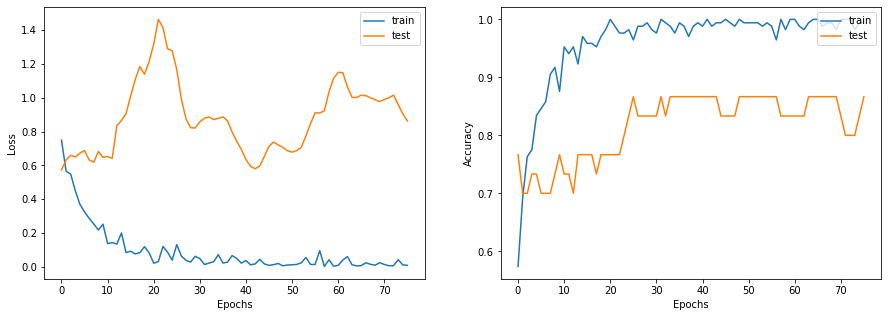

In [51]:
display_learning_curves(history)

In [52]:
x_test = df4.iloc[test_idx].index.to_numpy()
y_test = YQF[test_idx]
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 74.42%


In [53]:
def classify(test_pred):
    seq = []
    for i in range(len(test_pred)):
        x = test_pred[i]
        if x[0] > x[1]:
            seq.append(0)
        else:
            seq.append(1)
    return np.array(seq)

In [54]:
test_pred = gnn_model.predict(x_test)
test_pred_graph1 = classify(test_pred)
predYQF = np.zeros(len(YQF))
predYQF[train_idx] = YQF_train.reshape(-1)
predYQF[test_idx] = test_pred_graph1
df['predYQF'] = predYQF

3/3 [==============================] - 0s 11ms/step


In [55]:
df['mean_outOrigin_predQF'] = 0
df['mean_inOrigin_predQF'] = 0
df['mean_outDest_predQF'] = 0
df['mean_inDest_predQF'] = 0
for i in range(len(df)):
    OC = df.OriginCity.iloc[i]
    DC = df.DestCity.iloc[i]
    if len(df[df.OriginCity==OC][df.DestCity != DC]) > 0:
        df['mean_outOrigin_predQF'].iloc[i] = df[df.OriginCity==OC][df.DestCity != DC]['predYQF'].mean()
    else:
        df['mean_outOrigin_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.DestCity==OC]) > 0:
        df['mean_inOrigin_predQF'].iloc[i] = df[df.DestCity==OC]['predYQF'].mean()
    else:
        df['mean_inOrigin_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.OriginCity==DC]) > 0:
        df['mean_outDest_predQF'].iloc[i] = df[df.OriginCity==DC]['predYQF'].mean()
    else:
        df['mean_outDest_predQF'].iloc[i] = df['predYQF'].iloc[i]
    if len(df[df.DestCity==DC][df.OriginCity != OC]) > 0:
        df['mean_inDest_predQF'].iloc[i] = df[df.DestCity==DC][df.OriginCity != OC]['predYQF'].mean()
    else:
        df['mean_inDest_predQF'].iloc[i] = df['predYQF'].iloc[i]

In [56]:
X = scaler.fit_transform(df[cols2].to_numpy())
X = np.column_stack((X,df[['mean_outOrigin_predQF','mean_inOrigin_predQF','mean_outDest_predQF',
                           'mean_inDest_predQF','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))
X_train = X[train_idx].astype(np.float32)
X_test = X[test_idx].astype(np.float32)
df3=pd.concat([df,df]).reset_index()
df3['index'] = np.arange(len(df3))
df4 = df3[[x for x in cols3 if x not in ['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']]].apply(zscore)
df4 = pd.concat([df4,df3[['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']]],axis=1)
node_features = tf.cast(
    df4[cols4].values, dtype=tf.dtypes.float32
)
graph_info = (node_features, edges, edge_weights)
gnn_model2 = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=2,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model"
)
x_train = df4.iloc[train_idx].index.to_numpy()
y_train = YQF[train_idx]
history2 = run_experiment(gnn_model2, x_train, y_train)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 1.0924 - acc: 0.5148 - val_loss: 0.6503 - val_acc: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 102ms/step - loss: 0.6486 - acc: 0.6805 - val_loss: 0.6860 - val_acc: 0.7333
Epoch 3/2000
1/1 [==============================] - 0s 86ms/step - loss: 0.5441 - acc: 0.7811 - val_loss: 0.6108 - val_acc: 0.7333
Epoch 4/2000
1/1 [==============================] - 0s 92ms/step - loss: 0.4367 - acc: 0.7929 - val_loss: 0.5921 - val_acc: 0.7667
Epoch 5/2000
1/1 [==============================] - 0s 86ms/step - loss: 0.4583 - acc: 0.8047 - val_loss: 0.7294 - val_acc: 0.7667
Epoch 6/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.3732 - acc: 0.8343 - val_loss: 0.8320 - val_acc: 0.7667
Epoch 7/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.3096 - acc: 0.8521 - val_loss: 0.9618 - val_acc: 0.7667
Epoch 8/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.3028 - ac

Epoch 125/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.2759 - val_acc: 0.9000
Epoch 126/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3129 - val_acc: 0.9000
Epoch 127/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3438 - val_acc: 0.9000
Epoch 128/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3782 - val_acc: 0.8667
Epoch 129/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0146 - acc: 0.9941 - val_loss: 0.3898 - val_acc: 0.9000
Epoch 130/2000
1/1 [==============================] - 0s 86ms/step - loss: 0.0088 - acc: 0.9941 - val_loss: 0.4158 - val_acc: 0.9000
Epoch 131/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4443 - val_acc: 0.9000
Epoch 132/2000
1/1 [==============================] - 0s 84ms/step - 

In [57]:
history2 = run_experiment(gnn_model2, x_train, y_train)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 0.0296 - acc: 0.9882 - val_loss: 0.3819 - val_acc: 0.8667
Epoch 2/2000
1/1 [==============================] - 0s 95ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.5775 - val_acc: 0.8667
Epoch 3/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0631 - acc: 0.9763 - val_loss: 0.8999 - val_acc: 0.8667
Epoch 4/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0114 - acc: 0.9941 - val_loss: 1.2777 - val_acc: 0.8667
Epoch 5/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0409 - acc: 0.9822 - val_loss: 1.0888 - val_acc: 0.8667
Epoch 6/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.0228 - acc: 0.9941 - val_loss: 1.0110 - val_acc: 0.8667
Epoch 7/2000
1/1 [==============================] - 0s 91ms/step - loss: 0.0180 - acc: 0.9941 - val_loss: 0.9363 - val_acc: 0.9000
Epoch 8/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.0180 - acc

1/1 [==============================] - 0s 88ms/step - loss: 0.0780 - acc: 0.9882 - val_loss: 0.9421 - val_acc: 0.8667
Epoch 64/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.1371 - acc: 0.9763 - val_loss: 0.2510 - val_acc: 0.9000
Epoch 65/2000
1/1 [==============================] - 0s 87ms/step - loss: 7.4121e-04 - acc: 1.0000 - val_loss: 0.0379 - val_acc: 0.9667
Epoch 66/2000
1/1 [==============================] - 0s 96ms/step - loss: 0.0170 - acc: 0.9882 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 67/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.0141 - acc: 0.9941 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 68/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 69/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.0163 - acc: 0.9941 - val_loss: 0.0228 - val_acc: 1.0000
Epoch 70/2000
1/1 [==============================] - 0s 90ms/step - loss: 0.0154 - acc

In [58]:
x_test = df4.iloc[test_idx].index.to_numpy()
y_test = YQF[test_idx]
_, test_accuracy = gnn_model2.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 77.91%


In [59]:
test_pred = gnn_model2.predict(x_test)
test_pred_graph1 = classify(test_pred)
predYQF = np.zeros(len(YQF))
predYQF[train_idx] = YQF_train.reshape(-1)
predYQF[test_idx] = test_pred_graph1
df['predYQF'] = predYQF

3/3 [==============================] - 0s 11ms/step


In [60]:
df_2020 = pd.read_csv('AustraliaAirportData_2020.csv')
df_2020.drop('Unnamed: 0',axis=1,inplace=True)

In [61]:
cols = df_2020.columns.tolist()

In [75]:
s = ['firmnum','CityPair','OriginState','DestState','OriginCity','DestCity','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']
dvar = ['city_pairVA','city_pairQF','city_pairJQ','city_pairZL','city_pairQQ','city_pairTT','city_pairFC','city_pairTL',
        'city_pairFP','city_pairQN','city_pairSH','city_pairLCC']
cols2 = [x for x in cols if (x not in s) & (x not in dvar)]

In [76]:
scaler = StandardScaler()
X2 = scaler.fit_transform(df_2020[cols2].to_numpy())
X2 = np.column_stack((X2,df_2020[['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [77]:
predYQF2 = np.where(QFmodel_1.predict(X2).reshape(-1)>0.5,1,0)
df_2020['predYQF'] = predYQF2

9/9 [==============================] - 0s 655us/step


In [78]:
df_2020['mean_outOrigin_predQF'] = 0
df_2020['mean_inOrigin_predQF'] = 0
df_2020['mean_outDest_predQF'] = 0
df_2020['mean_inDest_predQF'] = 0
for i in range(len(df_2020)):
    OC = df_2020.OriginCity.iloc[i]
    DC = df_2020.DestCity.iloc[i]
    if len(df_2020[df_2020.OriginCity==OC][df_2020.DestCity != DC]) > 0:
        df_2020['mean_outOrigin_predQF'].iloc[i] = df_2020[df_2020.OriginCity==OC][df_2020.DestCity != DC]['predYQF'].mean()
    else:
        df_2020['mean_outOrigin_predQF'].iloc[i] = df_2020['predYQF'].iloc[i]
    if len(df_2020[df_2020.DestCity==OC]) > 0:
        df_2020['mean_inOrigin_predQF'].iloc[i] = df_2020[df_2020.DestCity==OC]['predYQF'].mean()
    else:
        df_2020['mean_inOrigin_predQF'].iloc[i] = df_2020['predYQF'].iloc[i]
    if len(df_2020[df_2020.OriginCity==DC]) > 0:
        df_2020['mean_outDest_predQF'].iloc[i] = df_2020[df_2020.OriginCity==DC]['predYQF'].mean()
    else:
        df_2020['mean_outDest_predQF'].iloc[i] = df_2020['predYQF'].iloc[i]
    if len(df_2020[df_2020.DestCity==DC][df_2020.OriginCity != OC]) > 0:
        df_2020['mean_inDest_predQF'].iloc[i] = df_2020[df_2020.DestCity==DC][df_2020.OriginCity != OC]['predYQF'].mean()
    else:
        df_2020['mean_inDest_predQF'].iloc[i] = df_2020['predYQF'].iloc[i]

In [79]:
X2 = scaler.fit_transform(df_2020[cols2].to_numpy())
X2 = np.column_stack((X2,df_2020[['mean_outOrigin_predQF','mean_inOrigin_predQF','mean_outDest_predQF',
                                  'mean_inDest_predQF','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [80]:
predYQF2 = np.where(QFmodel_2.predict(X2).reshape(-1)>0.5,1,0)
df_2020['predYQF'] = predYQF2

9/9 [==============================] - 0s 748us/step


In [81]:
Edgelist2020_1 = pickle.load(open('Edgelist2020_1.obj','rb'))
Edgelist2020_2 = pickle.load(open('Edgelist2020_2.obj','rb'))

In [82]:
X2 = scaler.fit_transform(df_2020[cols2].to_numpy())
X2 = np.column_stack((X2,df_2020[['mean_outOrigin_predQF','mean_inOrigin_predQF','mean_outDest_predQF',
                                  'mean_inDest_predQF','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [83]:
df2020_3=pd.concat([df_2020,df_2020]).reset_index()
df2020_3['index'] = np.arange(len(df2020_3))
df2020_4 = df2020_3[[x for x in cols3 if x not in ['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']]].apply(zscore)
df2020_4 = pd.concat([df2020_4,df2020_3[['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']]],axis=1)

In [85]:
Edgelist2020_2 = [(x+258,y+258) for x,y in Edgelist2020_2]
Edgelist2020 = np.array(Edgelist2020_1+Edgelist2020_2).T

In [86]:
edges = Edgelist2020
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    df2020_4[cols4].values, dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

In [95]:
x2 = df2020_4.index.values
pred2021 = gnn_model2.predict(x2)
pred_graph1 = classify(pred2021)

17/17 [==============================] - 0s 11ms/step


In [96]:
X = scaler.fit_transform(df[cols2].to_numpy())
X = np.column_stack((X,df[['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))
X_train = X[train_idx].astype(np.float32)

In [98]:
cols = cols2 + ['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']
shap_values = shap.KernelExplainer(QFmodel_1, data=X_train).shap_values(X_train)

Using 199 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/199 [00:00<?, ?it/s]

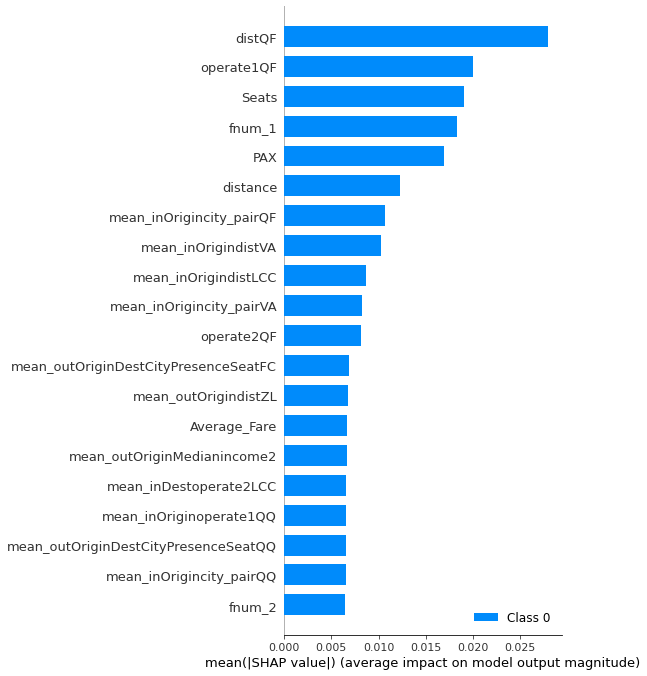

In [99]:
shap.summary_plot(shap_values, cols, plot_type="bar")

In [61]:
df = pd.read_csv('dep_2020_n_2021.csv')
X = scaler.fit_transform(df[cols2].to_numpy())
X = np.column_stack((X,df[['fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [62]:
YQF = np.where(df['city_pairQF']>0,1,0)
YQF = np.array([[y] for y in YQF])

In [63]:
QFmodel_1.evaluate(X, YQF, verbose = 1)
test_pred = QFmodel_1.predict(X)

14/14 [==============================] - 0s 820us/step


In [64]:
df['predY'] = test_pred.reshape(-1)

In [65]:
df['mean_outOrigin_pred'] = 0.
df['mean_inOrigin_pred'] = 0.
df['mean_outDest_pred'] = 0.
df['mean_inDest_pred'] = 0.
remove_list = []
for i in range(len(df)):
    OC = df.OriginCity.iloc[i]
    DC = df.DestCity.iloc[i]
    if len(df[df.OriginCity==OC][df.DestCity != DC]) > 0:
        df['mean_outOrigin_pred'].iloc[i] = df[df.OriginCity==OC][df.DestCity != DC]['predY'].mean()
    else:
        df['mean_outOrigin_pred'].iloc[i] = df['predY'].iloc[i]
        remove_list.append(i)
    if len(df[df.DestCity==OC]) > 0:
        df['mean_inOrigin_pred'].iloc[i] = df[df.DestCity==OC]['predY'].mean()
    else:
        df['mean_inOrigin_pred'].iloc[i] = df['predY'].iloc[i]
        if i not in remove_list:
            remove_list.append(i)
    if len(df[df.OriginCity==DC]) > 0:
        df['mean_outDest_pred'].iloc[i] = df[df.OriginCity==DC]['predY'].mean()
    else:
        df['mean_outDest_pred'].iloc[i] = df['predY'].iloc[i]
        if i not in remove_list:
            remove_list.append(i)
    if len(df[df.DestCity==DC][df.OriginCity != OC]) > 0:
        df['mean_inDest_pred'].iloc[i] = df[df.DestCity==DC][df.OriginCity != OC]['predY'].mean()
    else:
        df['mean_inDest_pred'].iloc[i] = df['predY'].iloc[i]
        if i not in remove_list:
            remove_list.append(i)

In [66]:
X = scaler.fit_transform(df[cols2].to_numpy())
X = np.column_stack((X,df[['mean_outOrigin_pred','mean_inOrigin_pred','mean_outDest_pred',
                           'mean_inDest_pred','fnum_1','fnum_2','fnum_3','fnum_4','fnum_5','fnum_6']].to_numpy()))

In [67]:
QFmodel_2.evaluate(X, YQF, verbose = 1)

14/14 [==============================] - 0s 2ms/step - loss: 7.8473 - accuracy: 0.8080


[7.847347736358643, 0.8079625368118286]

In [68]:
A2020 = pd.read_csv('AustraliaAirportData_2020.csv')
A2021 = pd.read_csv('AustraliaAirportData_2021.csv')

In [69]:
new_pairs = [x for x in A2021.CityPair.tolist() if x not in A2020.CityPair.tolist()]
nidx = df[df.CityPair.isin(new_pairs)].index.tolist()

In [70]:
QFmodel_2.evaluate(X[nidx], YQF[nidx], verbose = 1)

6/6 [==============================] - 0s 998us/step - loss: 0.4394 - accuracy: 0.8631


[0.4393848180770874, 0.863095223903656]